# Titanic Dataset

### Neste notebook é analisado o Dataset de sobreviventes do Titanic

Nota: este notebook inclui um link para que possa ser escondidas ou reveladas as células de código. 

In [180]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Nota: as células de código deste notebook estão ocultadas por defeito para facilitar leitura. Para as revelar/ocultar, clicar
 <a href="javascript:code_toggle()">aqui</a>.''')

## 1. Contexto

### 1.1. Introdução - O Titanic

O RMS Titanic era um cruzeiro da White Star Line, sendo à data do seu lançamento o maior navio do mundo. Terminado em Abril de 1912, afundou-se na sua viagem inaugural, ao colidir com um Iceberg a 600 Km a Sul da Terra Nova. 

Neste navio seguiam cerca de 2224 passageiros e tripulantes que viajavam em 1ª, 2ª ou 3ª classe, tendo morrido mais de 1500. Entre os passageiros de 1ª classe encontravam-se algumas das pessoas mais ricas do mundo, mas mesmo em 2ª ou 3ª classe existiam luxos invulgares para a época. São conhecidos os valores médios dos bilhetes do Titanic:

1ª classe: Parlor Suite (ex. Suite Presidencial) - até 870£. Cama - 30£.

2ª classe: 12£

3ª classe: 3£ a 8£.

Nesta sua 1ª viagem, o Titanic seguia de Southamptom (Reino Unido), para Nova Iorque (Estados Unidos da América). Pelo caminho, parou em Cherbourg (França) e Queenstown (Irlanda) para recolher passageiros para a viagem transatlântica.

![alt text](Images/1200px-RMS_Titanic_3.jpg "Titanic")

Devido aos regulamentos da época, o Titanic apenas transportava botes salva-vidas para 1178 passageiros, cerca de 1/2 dos que seguiam a bordo e 1/3 da sua capacidade. Assim, quando a evacuação se iniciou muitos foram os que ficaram para trás, especialmente os homens devido à política de evacuação prioritária de mulheres e crianças.

É também sabido que quanto melhor a classe em que se viajava, melhor o acesso ao "Deck" e assim aos botes salva-vidas. É também expectável que aos mais ricos e poderosos tenha sido dado acesso preferencial aos mesmos.

O impacto  no Iceberg deu-se no lado estibordo da proa do navio, tendo deformado o casco, comprometendo a sua estanquicidade. O Titanic encontrava-se já preparado para uma situação destas, contando com 16 compartimentos estanques, podendo ter 4 destes inundados em segurança. Infelizmente, o impacto com o iceberg provocou a inundação de 5 compartimentos, 1 a mais do que poderia suportar.

![alt text](Images/Suvival_Infographic.jpg "Titanic")

### 1.2. Os Datasets Titanic do Kaggle
Neste projeto iremos utilizar o Dataset (train_set.csv) do Titanic, associado à competição introdutória do Kaggle para efetuar um Pipeline de Data Science, explorando os dados, limpando-os, criando novos atributos, treinando e avaliando modelos. 

Tendo no DataSet train_set, informação relativa à variável Target binária "Survived", este constitui um problema supervisionado de clasificação.

Por fim, será utilizado um segundo DataSet (test_set.csv), que contém a segunda amostra dos passageiros do Titanic mas sem informação relativa à variável Target "Survived", para prever estes casos e submeter os resultados no Kaggle.

### 1.3. Importação de Bibliotecas e dos Datasets train_set e test_set.

In [181]:
#Importar bibliotecas seaborn e matplotlib para visualização de dados e Numpy e Pandas para manipulação de DataFrames. 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Permitir visualização de gráficos na célula de código e armazenar gráficos no Notebook
%matplotlib inline

#Importar métodos da Biblioteca sklearn
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from scipy import interp

# Importar Classificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Importar métricas de avaliação
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, auc, precision_recall_curve, average_precision_score

In [182]:
#Importa dados de treino para DataFrame "titanic"
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

### 1.4. Quais os atributos do Dataset?

In [183]:
# Mostra informação sobre os Dataset- número de entradas, atributos e número de entradas não nulas: train_set.
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [184]:
# Mostra informação sobre os Dataset- número de entradas, atributos e número de entradas não nulas: test_set.
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


O Dataset de treino contém informação relativa a 891 passageiros e o de teste a 418 passageiros.

In [185]:
#Visualizar o cabeçalho do DataFrame
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1.5. Breve descrição dos atributos

O Dataset é constituído pelos seguintes atributos:

PassengerId - nº sequencial de cada linha do Dataset. Não está relacionado com o passageiro e deve ser ignorado nas análises.

Survived - Indicação de sobrevivência do passageiro (0 não sobreviveu, 1 sobreviveu).

Pclass - Classe em que viajava o passageiro, 1ª classe a mais luxuosa e 3ª a menos.

Name - Nome do passageiro, disposto da forma: apelido, título, primeiro nome, restantes nomes. Em alguns casos, em () surge um outro nome, provavelmente correspondente a alguém que viaja associada ao passageiro - sendo 1ª classe, será um criado/criada? O título, como veremos, é útil para prever Missing Values relativos à idade do passageiro e o apelido será também utilizado para identificar grupos de passageiros.

Sex - Sexo do passageiro, "male" ou "female".

Age - Idade do passageiro. Importante notar que existem valores com casas decimais, quando é um bebé com menos de 1 ano ou quando a idade é estimada.

SibSp - Número de irmã(o)s e esposo que viaja com o passageiro em questão.

Parch - Número de filha(o)s ou pais que viajam com o passageiro.

Ticket - Número de bilhete associado ao passageiro.

Fare - Valor pago pelo passageiro para a viagem.

Cabin - Número da Cabine onde viajava. Do cabeçalho é possível identificar logo alguns Missing Values.

Embarked - Porto de embarque do passageiro: S-Southamptom, C-Cherbourg, Q-Queenstown.

__Atributos por tipo:__

Categóricos - Binários: Survived;

Categóricos - Nominais: Sex, Embarked;

Categóricos - Ordinais: Pclass.

Numéricos - Discretos: SibSq, Parch;

Numéricos - Contínuos: Age, Fare.

Outros atributos (identificativos) - PassengerId (numérico), Name (alfabético), Ticket(alfanumérico), Cabin(alfanumérico)

## 2. Exploratory Data Analysis
 
 

### 2.1. Mssing Values
Iniciaremos a exploração de dados procurando o número de valores em falta "Missing Values", por atributo.

In [186]:
#Quantos null values existem por atributo? - train_set
train_set.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [187]:
#Quantos null values existem por atributo? - test_set
test_set.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

 - DataSet  __train_set__: __O atributo "Cabin" é o que apresenta maior número de Missing Values__, com 687 casos (77%), seguido da "Age" com 177 casos (20%) e por fim "Embarked" com apenas 2 casos (0,2%).
 - DataSet  __test_set__: __O atributo "Cabin" é o que apresenta maior número de Missing Values__, com 327 casos (76%), seguido da "Age" com 86 casos (21%) e por fim "Fare" com apenas 1 caso (0,2%).

Constituindo a esmagadora maioria e não sendo imediatamente aparente como seria possível estimar com fiabilidade esta informação, optei por __excluir o atributo "Cabin" do Dataset.__ Esta exclusão é feita no capítulo Data Cleaning.

Quanto aos __Missing Values de Age, Fare e Embarked, procurarei preenchê-los__ utilizando alguns dos restantes atributos como veremos em Feature Engineering.

### 2.2. Breve descrição estatística do Dataset

Exploremos agora os valores médios, desvios padrão, min/max e quartis de todos os atributos numéricos.

In [188]:
#Explorar a média, desvio padrão, min, máx e quartis dos atributos numéricos, ignorando PassengerId.
train_set.drop('PassengerId',axis=1).describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Do quadro anterior, podemos inferir que:

- Apenas 38 % dos passageiros sobreviveram, semelhante aos 33% registados na realidade. Isto também nos indica que o DataSet tem algum desiquilíbrio, o que poderá induzir Bias a modelos sensíveis.

- Existem substancialmente mais passageiros em 3ª classe que em 1ª.

- A idade média dos passageiros era de 30 anos, com 50% da população contida entre os 20 e os 38 anos.

- A maioria dos passageiros viajava sem relativos (ou essa informação não se encontra registada no DataSet).

- Ao contrário do que seria de esperar, mais de metade dos passageiros têm associadas Fares superiores ao 12£ correspondentes ao bilhete de 2ª classe. Esta informação será explorada em mais detalhe mais à frente.

Vejamos de seguida o número de passageiros que viaja com familiares a bordo.

In [189]:
#Verificar número de passageiros que viajavam com familiares a bordo (esposo(a), irmãos, e meios-irmãos)
train_set['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [190]:
#Verificar número de passageiros que viajavam com descendentes/ascendentes a bordo (filhos, afilhados, pais)
train_set['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Verificamos assim que:
   - A maioria dos passageiros __(68%) não viajava com irmãos/esposos__;
   - A maioria dos passageiros __(76%) não viajava com descendentes/descendentes__.
   
   - Apenas 8,3% dos passageiros viaja com mais do que 1 irmão/esposo;
   - Apenas 10,7% dos passageiros viaja com mais de 1 filho/pai.
   
Vejamos agora a percentagem de sobreviventes por atributo:

In [191]:
#Retorna percentagem (= média) de sobreviventes por sexo "Sex"
train_set[['Survived','Sex']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [192]:
#Retorna percentagem (= média) de sobreviventes por classe "Pclass"
train_set[['Survived','Pclass']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [193]:
#Retorna percentagem (= média) de sobreviventes por nº de familiares (esposo(a), irmãos, meios-irmãos)"SibSp"
train_set[['Survived','SibSp']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [194]:
#Retorna percentagem (= média) de sobreviventes por nº de ascendentes/descendentes "Parch"
train_set[['Survived','Parch']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


Da análise das tabelas anteriores é possível concluir que a __probabilidade de sobrevivência aparenta ser melhor se__:
   - __O sexo for feminino__: 74,2% das mulheres sobreviveram, vs. apenas 18,8% dos homens;
   - __A classe for melhor__: 63% dos passageiros de 1ª classe sobreviveram vs. 47,3% de 2ª e apenas 24,2% de 3ª classe;
   - __Tiver 1 ou 2 irmãos/esposos__: cerca de 50% dos passageiros nestas condições sobreviveram;
   - Parece existir uma maior probabilidade de sobrevivência de passageiros com 1 a 3 pais ou filhos a bordo.

## 3. Visualização de dados

Nesta secção iremos explorar mais o Dataset, representando-o graficamente.

### 3.1. Contagem de sobreviventes (total e por sexo)

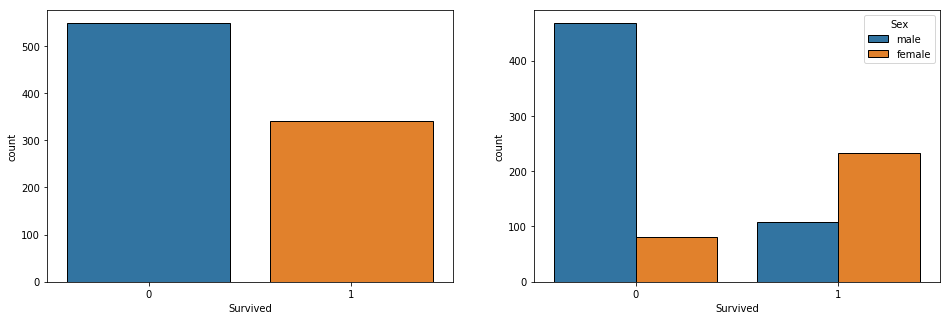

In [195]:
#Visualizar a variável Target "Survived" por si só e considerando o sexo dos passageiros
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(16, 5))
sns.countplot(x="Survived",data=train_set,ax=ax1)
sns.countplot(x="Survived",data=train_set, hue='Sex',ax=ax2)

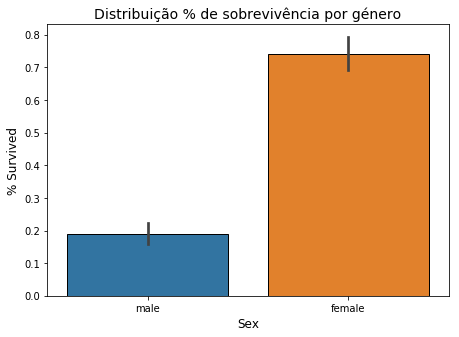

In [196]:
plt.subplots(figsize = (7.2,5))
ax = sns.barplot(x = "Sex", y = "Survived", data=train_set)
plt.title("Distribuição % de sobrevivência por género", fontsize = 14)
plt.ylabel("% Survived", fontsize = 12)
plt.xlabel("Sex",fontsize = 12);

Os 3 gráficos em cima confirmam que houve um maior número de passageiros que não sobreviveu (~ 550 de 891). Confirma também apesar da maioria dos passageiros serem do sexo masculino, houve uma maior percentagem, ~ 74% (e número absoluto ~ 230) de sobreviventes do sexo feminino.

O sexo dos passageiros parece assim ter elevada relevância para a previsão de sobrevivência dos passageiros.

### 3.2. Contagem de sobreviventes por classe (1ª, 2ª e 3ª)

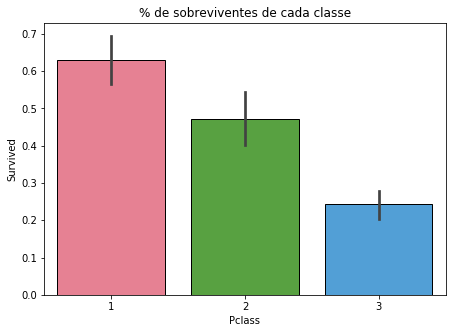

In [197]:
#Visualizar atributos: Pclass / Survived - BarPlot
plt.subplots(figsize = (7.2,5))
gr = sns.barplot(x='Pclass',y='Survived',data=train_set,palette='husl')
gr = plt.title('% de sobreviventes de cada classe')

Do gráfico 3.1.a) é evidente que __quanto melhor a classe em que viajava o passageiro, maior a sua probabilidade de sobrevivência__, tendo sobrevivido ~ 62% na 1ª classe, ~47% na 2ª classe e ~25% na 3ª classe. 

Pclass parece ser assim um atributo muito importante para a previsão de sobreviventes.

### 3.3. Sobrevivência por idade dos passageiros

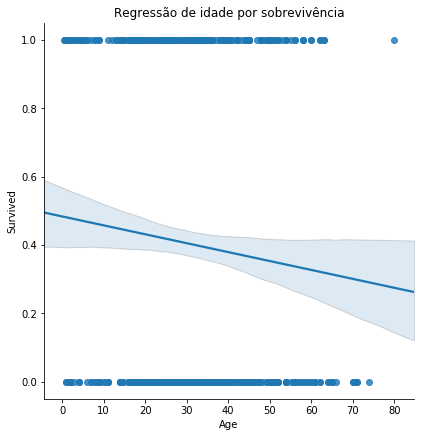

In [198]:
#Visualizar atributos: age / Survived - regression plot
ax = sns.lmplot(x='Age',y='Survived',data=train_set,size=6)
ax = plt.title('Regressão de idade por sobrevivência')

Devido à comparação com uma variável binária (Survived), a informação que pode ser extraída deste gráfico é limitada, já que os pontos se encontram "condensados" em 0 ou 1. Ainda assim parece apontar para a existência de uma correlação negativa, ou seja, quanto maior a idade do passgeiro, maior a sua probabilidade de não ter sobrevivido.

Exploremos agora esta informação sob a forma de um Distribution e Kernel Density Plots.

C:\Users\migue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 80)

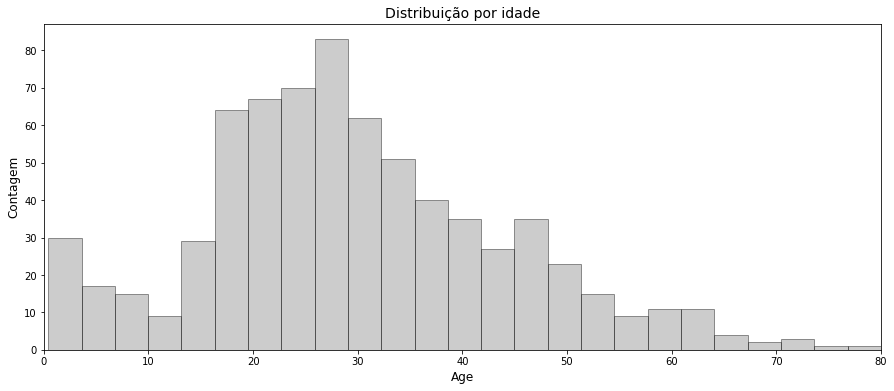

In [199]:
#Visualizar atributos: age / Survived - Distribution Plot

#Força o Seaborn a colocar linhas de separação entre Bins
plt.rcParams["patch.force_edgecolor"] = True

#Cria o histograma e limita os seus valores de eixo em x
fig = plt.figure(figsize=(15,6))
sns.distplot(train_set[train_set['Age'].isna()==False]['Age'],kde=False,bins=25,color='gray')
plt.title('Distribuição por idade', fontsize = 14)
plt.xlabel("Age", fontsize = 12)
plt.ylabel('Contagem', fontsize = 12);
plt.xlim(0,80)

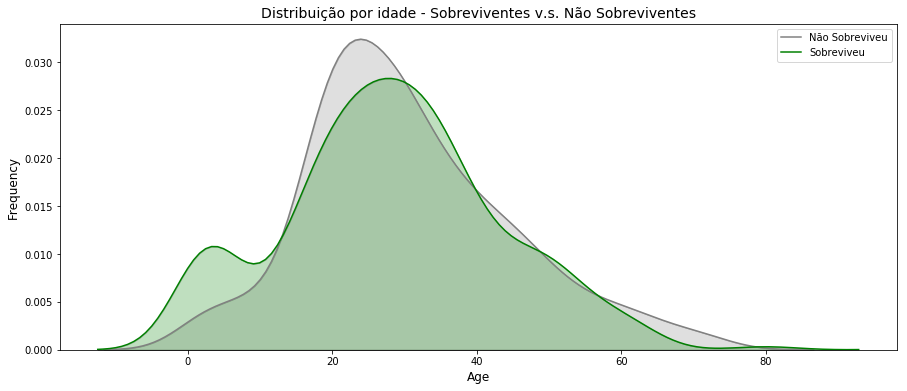

In [200]:
#Visualizar atributos: age / Survived - Kernel Density Plot
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(train_set.loc[(train_set['Survived'] == 0)&(train_set['Age'].isna()==False),'Age'] , color='gray',shade=True,label='Não Sobreviveu')
ax=sns.kdeplot(train_set.loc[(train_set['Survived'] == 1)&(train_set['Age'].isna()==False),'Age'] , color='g',shade=True, label='Sobreviveu')
plt.title('Distribuição por idade - Sobreviventes v.s. Não Sobreviventes', fontsize = 14)
plt.xlabel("Age", fontsize = 12)
plt.ylabel('Frequency', fontsize = 12);

Por forma simplificar a visualização de idades no gráfico de distribuição, foram definidos 25 bins, agrupando assim as idades dos passageiros em grupos de ~3,2 anos por Bin.

A distribuição permite-nos tirar algumas conclusões relativamente à distribuição das idades dos passegeiros do Dataset train_set:
 - A maioria dos passageiros tem idade compreendida entre os 18 e 36 anos, constituindo ~50% da amostra. 
 - O 1º bin do gráfico é um máximo local com cerca de ~30 passgeiros, neste caso bebés.
 - Existem cerca de 110 bebés, crianças e adolescentes a bordo (idade <18 anos), representando ~12% da amostra.
 
O KDE plot permite-nos tirar algumas conclusões sobre o rácio entre sobreviventes e não sobreviventes por idade:
 - Sobreviveram mais crianças do que perderam a vida;
 - Já no caso de jovens adultos (aproximadamente entre os 18 e os 40 anos), o contrário verifica-se, tendo perdido a vida mais passageiro do que os que sobreviveram. Esta tendência apenas se volta a verificar de forma pronunciada em passageiros "séniores", com aproximadamente >60 anos.
 

### 3.4. Visualização combinada de idade e género

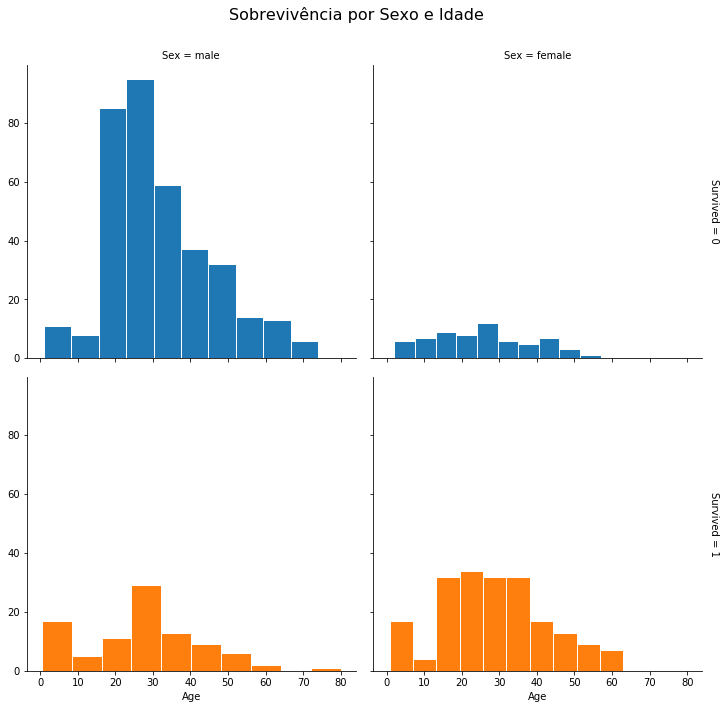

In [201]:
ax = sns.FacetGrid(data=train_set,size=5,row='Survived',col='Sex', hue='Survived', margin_titles=True)
ax = ax.map(plt.hist, "Age", edgecolor = 'white')
ax.fig.suptitle("Sobrevivência por Sexo e Idade", size = 16)
plt.subplots_adjust(top=0.90)

O gráfico anterior apresenta a distribuição de idade dos passageiros por 2 eixos distintos: género e sobrevivência. Através do mesmo, podemos observar as tendências já anteriormente verificadas de maior sobrevivência de passageiras do sexo feminino e de crianças quando comparadas com passageiros do sexo masculino.

O gráfico permite-nos no entanto tirar algumas conclusões novas como:
 - O sexo do passageiros com menos de ~ 16/18 anos não parece constituir um fator relevante, existindo uma distribuição semelhante de crianças de ambos os sexos que sobrevivem vs as que não sobreviveram;
 - No caso das passageiras, não parece existir uma ligação evidente entre a sobrevivência e a idade, com uma distribuição muito plana nas passageiras que perderam a vida.
 - Já no caso dos passageiros, verifica-se que os passageiros com idades compreendidas entre ~25 e 32 anos sobreviveram num rácio superior aos passageiros com idade ~16 e 25 anos. Acima dos 32 anos, a distribuição de passageiros que sobrevivem parece assumir uma forma semelhante (mas com magnitude inferior) à dos que não sobrevivem.

### 3.5. Visualização combinada de idade e classe

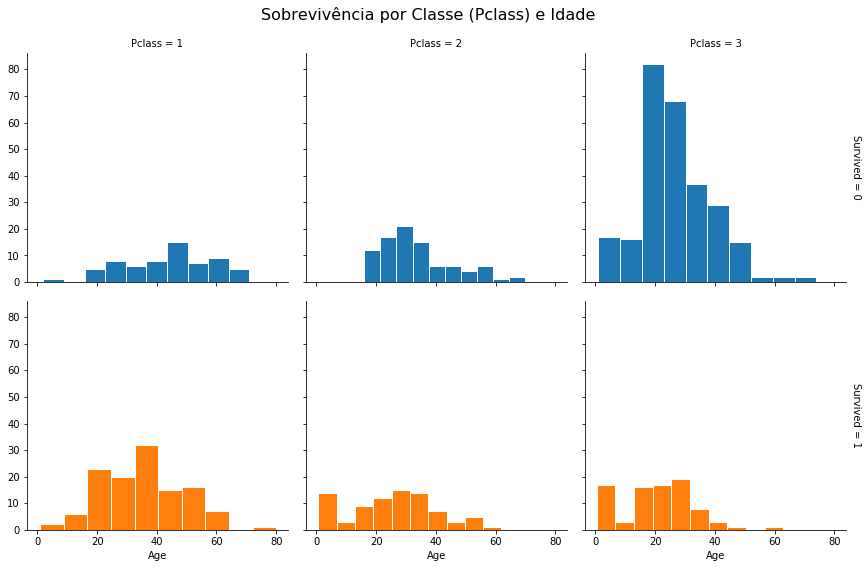

In [202]:
ax = sns.FacetGrid(data=train_set,size=4,row='Survived',col='Pclass', hue='Survived', margin_titles=True)
ax = ax.map(plt.hist, "Age", edgecolor = 'white')
ax.fig.suptitle("Sobrevivência por Classe (Pclass) e Idade", size = 16)
plt.subplots_adjust(top=0.90)

O gráfico anterior apresenta as distribuições de idade dos passageiros por classe (Pclass) e sobrevivência.

 - Existem substancialmente mais passageiros de 3ª classe que de 2ª classe ou 1ª classe;
 - Existe um número semelhante de passageiros de 1ª e 2ª classe;
 - No caso de passageiros de 1ª classe, é evidente que sobreviveram maior número de passageiros do que perderam a vida. É também visível que a idade média dos passageiros é superior à das restantes classes e grande número de passageiros de meia idade;
 - A 2ª classe parece ter uma distribuição intermédia entre a 1ª e 3ª classes como seria de esperar, com uma idade média intermédia e maior proporção de passageiros que não sobreviveram;
 - Na 3ª classe são raros os passageiros com mais de ~45 anos, com a maioria a ter uma idade compreendida entre ~ 16 e 28 anos.

### 3.6. Visualização de % de sobreviventes por nº de relativos (irmãos e esposos) - SibSp

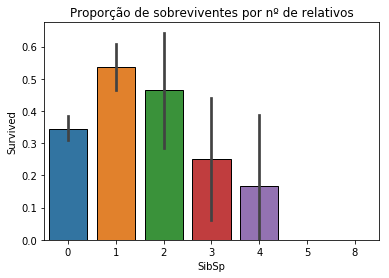

In [203]:
#Visualizar atributos: SibSp / Survived - BarPlot
gr = sns.barplot(x='SibSp',y='Survived',data=train_set)
gr = plt.title('Proporção de sobreviventes por nº de relativos')

Como podemos observar no Barplot anterior:
 - Passageiros que viajam com 1 ou 2 irmãos/esposos (SibSp) tiveram maior % de sobrevivência, rondando os 50%. Apesar dos valores médios;
 - ~34% dos passageiros que viajavam sem irmãos/esposos sobreviveram.
 - Passageiros com 3 ou 4 relativos, tiveram menores % de sobrevivência;
 - Não há registo de sobreviventes em famílias com 5 ou + irmãos/esposos;
 - É visível uma incerteza crescente (representada pela linha preta), quanto maior o número de SibSp. Isto poderá estar relacionado com o número decrescente de passageiros que se enquadram em cada uma das "categorias" de nº de relativos.

### 3.7. Visualização de % de sobreviventes por nº de ascendentes/descendentes (pais/avós e filhos/netos)

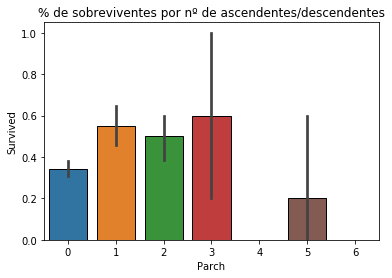

In [204]:
#Visualizar atributos: SibSp / Survived - BarPlot
gr = sns.barplot(x='Parch',y='Survived',data=train_set)
gr = plt.title('% de sobreviventes por nº de ascendentes/descendentes')

À semelhança da visualização anterior, o número de ascendentes e descendentes (Parch) é representado através de um gráfico de barras:
 - Existe uma maior percentagem de sobreviventes com 1 a 3 ascendentes/descendentes;
 - Com mais de 4, parece existir uma maior probabilidade de perda de vida da família inteira, talvez porque seja mais difícil garantir lugar em bote salva vidas a toda a família levando a que todos fiquem junto no Titanic. Outra hipótese é que as famílias mais numerosas sejam de 3ª classe, que como vimos tem um taxa de sobrevivência muito inferior à das restantes;
 - Como no caso dos SibSp, a incerteza aumenta com o número de Parch, talvez pelo número cada vez inferior de passageiros com valores elevados neste atributo.

### 3.8. Visualização de Fare (valor pago para a viagem, por passageiro)

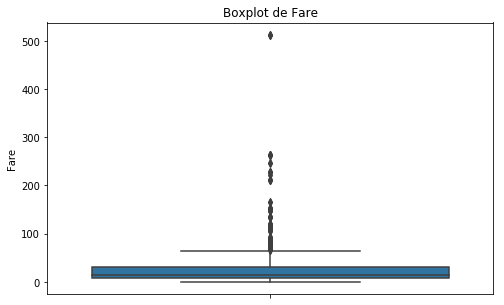

In [205]:
#Visualizar Fare em Boxplot
fig = plt.figure(figsize=(8,5))
sns.boxplot(y=train_set['Fare'])
gr = plt.title('Boxplot de Fare')

A análise à Fare é iniciada com um Boxplot. Como podemos verificar, existem muitos valores "Outliers", que "esmagam" a visualização e não permitem perceber os quartis identificados no gráfico. Vejamos assim o mesmo gráfico limitando o eixo y.

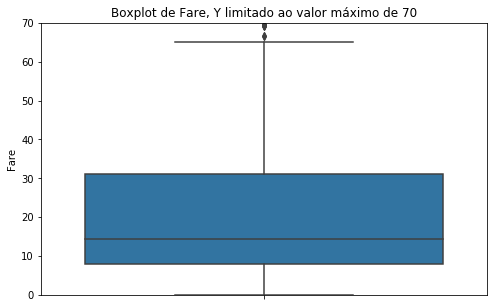

In [206]:
#Do Boxplot anterior verificamos um número de Outliers. 
#Qual o valor identificado no Boxplot apartir do qual estes são considerados Outliers?
#Visualizar Fare em Boxplot
fig = plt.figure(figsize=(8,5))
sns.boxplot(y=train_set['Fare'])
plt.ylim(0,70)
gr = plt.title('Boxplot de Fare, Y limitado ao valor máximo de 70')

É possível observar que:
 - São identificados como Outliers todas as Fares superiores a 65.
 - 1º quartil ~ [0  7,9];
 - 2º quartil ~ ]7,9  14,5];
 - 3º quartil ~ ]14,5  31];
 - 4º quartil ~ ]31  65].
 
Relembremos o preço real dos bilhetes:
 - 1ª classe: Parlor Suite (ex. Suite Presidencial) - até 870£. Cama - 30£.
 - 2ª classe: 12£
 - 3ª classe: 3£ a 8£.
 
Os quartis identificados parecem ter assim valores superiores ao que seria de esperar, com um 4º quartil inteiro acima do preço de 1ª classe (excluíndo apenas as melhores cabines). Também a existência de 50% dos passageiros com Fare superior a 14 (acima do preço de 2ª classe) sugere a necessidade de cautela ao lidar com estes valores. 

Não contendo mais informação que o possa explicar, a existência de valores de Fare iguais a 0 poderá também ser considerado um Missing Value, pelo que serão tratados como tal. Os valores elevados de Fare foram explorados em mais detalhe nos capítulos de "Data Cleaning" e "Feature Engineering" que veremos de sequida.

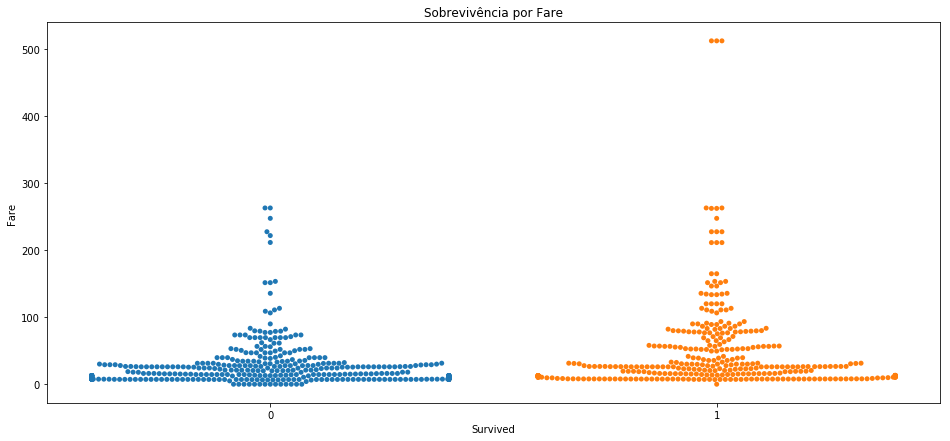

In [207]:
# Visualizar relação entre "Fare" e "Survived" 
fig = plt.figure(figsize=(16,7))
sns.swarmplot(x="Survived", y="Fare",data=train_set)
gr = plt.title('Sobrevivência por Fare')

Por fim, a análise de Fare termina com a visualização de sobrevivência por valor de Fare. Parece existir maior número de passageiros que não sobrevivem na base do Swarm, enquanto os casos Outliers (Fares elevadas) parecem ter maior percentagem de sobrevivência.

### 3.9. Visualização de Sobrevivência por porto de embarque 

Não sendo imediatamente evidente qual seria a influência do porto de embarque dos passageiros para a sua sobrevivência, iremos ainda assim explorar este atributo através de gráficos de barras.

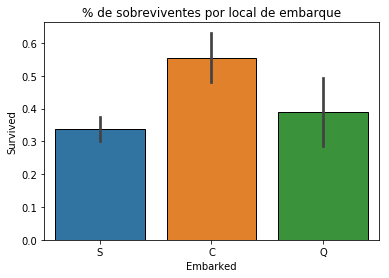

In [208]:
#Visualizar atributos: Embarked / Survived - BarPlot
gr = sns.barplot(x='Embarked',y='Survived',data=train_set)
gr = plt.title('% de sobreviventes por local de embarque')

O gráfico de barras parece evidencias uma maior probabilidade de sobrevivência de passageiros embarcados em Cherbourg (França), acima dos 50%. Relativamente aos restantes locais, de embarque ronda os 35%. A incerteza é no entanto superior nas colunas Cherbourg e Queenstown, evidenciando um menor número de passageiros a embarcar em Cherbourg e especialmente em Queenstown.

Será que esta diferença de sobrevivência de passageiros embarcados em Cherboug está relacionada com o embarque de uma população com maior proporção de passageiros de 1ª classe?

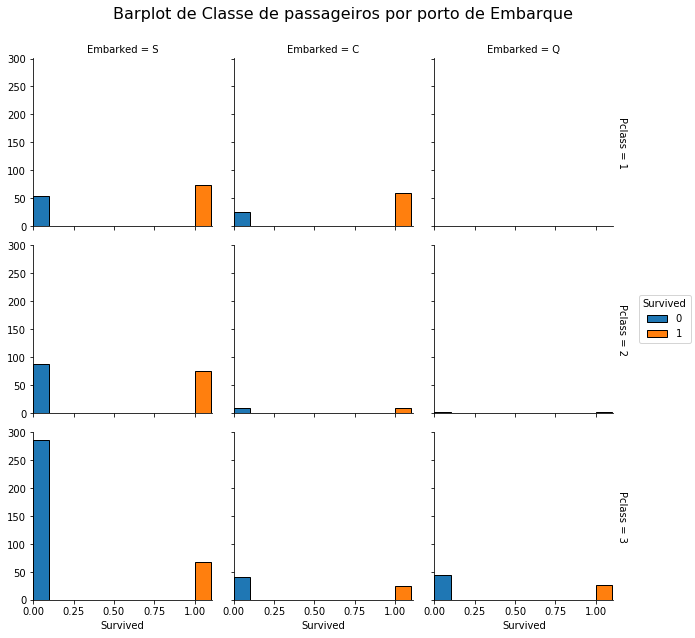

In [209]:
#Visualizar atributos: Embarked / Pclass - BarPlot
g = sns.FacetGrid(train_set, col="Embarked",  row="Pclass",hue='Survived',size=3, margin_titles=True,legend_out=True,xlim=[0,1.11])
g = g.map(plt.hist, "Survived")
g.add_legend();
g =g.fig.suptitle('Barplot de Classe de passageiros por porto de Embarque',size=16)
plt.subplots_adjust(top=0.9)

Como se suspeitava, os passageiros que embarcaram em Cherbourg era maioritariamente de 1ª classe, que como vimos teve uma taxa superior de sobrevivência. Isto parece sugerir que é um atributo com pouca relevância para a previsão de sobrevivência, já que contém informação já existente em Pclass.

### 3.10. Mapa de calor - correlação entre atributos numéricos

Para finalizar a visualização de atributos, analisaremos o mapa de calor de correlação entre atributos numéricos. Sendo uma variável categórica, converterei o género "Sex" de male/female para 0/1, para poder ser visualizada a sua correlação com as restantes variáveis.

In [210]:
#Converter male para 1 e female para 0 nos Datasets
train_set['Sex'] = train_set['Sex'].map({"male":0,"female":1}).astype(int)
test_set['Sex'] = test_set['Sex'].map({"male":0,"female":1}).astype(int)

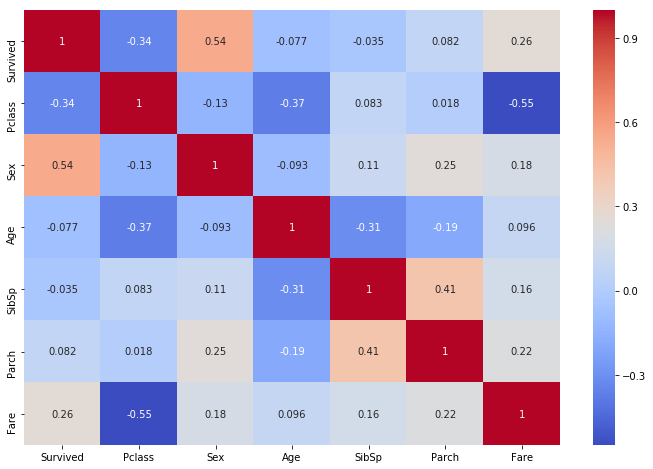

In [211]:
#Visualizar correlação entre atributos
fig=plt.figure(figsize=(12,8))
sns.heatmap(train_set.drop('PassengerId',axis=1).corr(),cmap='coolwarm',annot=True)

Do Heatmap de correlações entre campos, podemos verificar que:
 - Survived: Sex é o atributo com maior correlação com Survived (0,54), que como esperado, indica uma maior probabilidade de sobrevivência para as passageiras (representadas por 1). PClass é o 2º campo com maior correlação com Survived (-0.34), ou seja, quanto melhor a classe, maior a probabilidade de sobrevivência. Fare é o que se segue com 0.26, com uma correlação positiva;
 
 - PClass/Fare: Existe forte correlação entre Fare e PClass (-0.55). É expectável já que as classes melhores custarão mais. Também Age tem forte correlação com Pclass, indicação que quem se encontra nas classes melhores tipicamente tem mais idade;

 - Age e SibSp/Parch: Curiosamente, a idade dos passageiros não apresenta uma correlação forte com Survived, como aliás se verifica para SibSp e Parch. Talvez o ajuste destas variáveis (agrupar idades em Bins e criar um novo atributo que inclua informação de Parch e Sibsp) possa melhorar a correlação dos mesmos com a variável Target.
 
 - Sex: Como referido, existe uma forte correlação entre o sexo do passageiro e a sobrevivência.

## 4. Data Cleaning

Como vimos anteriormente, os Datasets train_set e test_set têm valores em falta, bem como Outliers que devem ser tratados para garantir a qualidade dos dados.

Esta limpeza será efetuada e explicada neste capítulo.

In [212]:
#Guarda ficheiros CSV - Etapa 0 (dados com apenas conversão de Sexo para 0 e 1)
train_set.to_csv("E00_train.csv",index=False)
test_set.to_csv("E00_test.csv",index=False)

### 4.1. Cabin

Como vimos anteriormente, a maioria dos passageiros no Dataset têm o atributo Cabin em falta (77% em train_set). Sendo esta proporção tão elevada e não sendo este as cabines atributos únicos que não podem ser previstos (existem n cabines, cada qual com um código único e que levam um número de passageiros desconhecidos), e não sendo evidente que este atributo contenha informação que não esteja já em Pclass e Fare, optei por eliminá-lo.

In [213]:
train_set.loc[train_set['Cabin'].isna() == False,'Cabin'] = 1
test_set.loc[test_set['Cabin'].isna() == False,'Cabin'] = 1

In [214]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [215]:
train_set['Cabin'].fillna(0,inplace = True)
test_set['Cabin'].fillna(0,inplace = True)

In [216]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,S


In [217]:
#Eliminar a coluna "Cabin" do Dataset
train_set = train_set.drop(['Cabin'],axis=1)
test_set = test_set.drop(['Cabin'],axis=1)

In [218]:
#Guarda ficheiros CSV - Etapa 1
train_set.to_csv("E01_train.csv",index=False)
test_set.to_csv("E01_test.csv",index=False)

### 4.2 Embarked

O train_set tem 2 casos em que Embarked está em falta. 

Para preencher estes casos, irei utilizar a moda (valor mais frequente) do grupo de passageiros da mesma Pclass.

In [219]:
train_set[train_set['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,NaN


In [220]:
#Preencher os Null Values com a moda do Porto de Embarque, agrupando por Pclass correspondente

for i in range(1,4):
    train_set.loc[(train_set['Embarked'].isna()) & (train_set['Pclass'] == i),'Embarked'] \
    = train_set[(train_set['Embarked'].isna()==0) & (train_set['Pclass'] == i)]['Embarked'].mode()[0]
                                                  
    test_set.loc[(test_set['Embarked'].isna()) & (test_set['Pclass'] == i),'Embarked'] \
    = test_set[(test_set['Embarked'].isna()==0) & (test_set['Pclass'] == i)]['Embarked'].mode() [0] 

In [221]:
train_set[train_set['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [222]:
#Transformar Embarked em variável numérica - S:0, C:1, Q:2
#train_set['Embarked'] = train_set['Embarked'].map({"S":0,"C":1,"Q":2}).astype(int)
#test_set['Embarked'] = test_set['Embarked'].map({"S":0,"C":1,"Q":2}).astype(int)

In [223]:
#Guarda ficheiros CSV - Etapa 2
train_set.to_csv("E02_train.csv",index=False)
test_set.to_csv("E02_test.csv",index=False)

Ficaram assim preenchidos todos as linhas (2) com informação Embarked em falta.

### 4.3. Age

Encontrando-se em falta a informação de idade de cerca de 20% dos passageiros, é muito importante ser criterioso no seu preenchimento, já que o seu impacto na qualidade final dos dados.

Como veremos em baixo, o atributo "Name" inclui o título do passageiro, através do qual é possível criar grupos de faixa etária. Com estes grupos, bem como com Pclass (em Data Visualization era evidente que a distribuição etária varia por Pclass), torna-se possível estimar a idade, através da mediana, com muito mais fidelidade.

Começaremos assim por extrair o título do nome, criando para o efeito um novo atributo "Title".

### 4.3.1. Novo atributo Title

In [224]:
#Criar novo atributo com o título existente no atibuto Name
train_set['Title'] = train_set.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_set['Title'] = test_set.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_set['Title'],train_set['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


Uma descrição dos títulos segue-se:
 - Capt - Captain;
 - Col - Colonel;
 - Countess - Condessa;
 - Don - Reitor;
 - Dr - Doutor;
 - Jonkheer - Nobre Holandês;
 - Lady - Nobre, equivalente a Sir;
 - Major - Major;
 - Master - Criança do sexo masculino;
 - Miss - Criança ou mulher ainda não casada;
 - Mlle - Mademoiselle, equivalente a Miss;
 - Mme - Madame, equivalente a Mrs.;
 - Mr - Senhor;
 - Mrs - Senhora;
 - Ms - Senhora cujo estado civil não é conhecido;
 - Rev - Reverendo;
 - Sir - Cavaleiro, título nobre.
 
Existem muitos títulos com ocorrências pontuais. Estes serão agrupados em grupos maiores: Master:1, Mr:2, Mrs:3, Miss:4, Noble:5, Religious:6.

Vemos também que Miss e Master nos poderão auxiliar na previsão da idade do passageiro. Vejamos agora o número de sobreviventes por título.

In [225]:
#Como se comparam os títulos com a variável Survived?
pd.crosstab(train_set['Title'],train_set['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


Podemos concluir que aos títulos nobiliárquicos estão associadas maiores probabilidades de sobrevivência, assim como a todos os títulos femininos e a Master, o título masculino referente a rapazes. 

Finalmente, os títulos masculinos como Mr. e títulos religiosos estão ligados a probabilidades inferiores de sobrevivência.

Os títulos serão então agrupados como anteriormente definido.

In [226]:
#Condensar títulos e alterá-los para colunas de 0 a 1
train_set['Title'] = train_set['Title'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Sir','Dona'],'Noble')
train_set['Title'] = train_set['Title'].replace(['Mlle'],'Miss')
train_set['Title'] = train_set['Title'].replace(['Mme','Ms'],'Mrs')
train_set['Title'] = train_set['Title'].replace(['Rev'],'Religious')

test_set['Title'] = test_set['Title'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Sir','Dona'],'Noble')
test_set['Title'] = test_set['Title'].replace(['Mlle'],'Miss')
test_set['Title'] = test_set['Title'].replace(['Mme','Ms'],'Mrs')
test_set['Title'] = test_set['Title'].replace(['Rev'],'Religious')

Façamos uma breve análise estatística das idades por título e classe do passageiro.

In [227]:
#Verificar estatísticas das idades em função do título
train_set[['Title','Age']].groupby('Title').describe()

Age                                                        
           count       mean        std    min     25%   50%    75%   max
Title                                                                   
Master      36.0   4.574167   3.619872   0.42   1.000   3.5   8.00  12.0
Miss       148.0  21.804054  12.904198   0.75  14.375  21.0  30.00  63.0
Mr         398.0  32.368090  12.708793  11.00  23.000  30.0  39.00  80.0
Mrs        110.0  35.718182  11.409100  14.00  27.250  35.0  44.00  63.0
Noble       16.0  46.437500  11.564133  23.00  39.500  48.5  52.50  70.0
Religious    6.0  43.166667  13.136463  27.00  31.500  46.5  53.25  57.0

In [228]:
#Verificar estatísticas das idades em função da classe do passageiro
train_set[['Pclass','Age']].groupby('Pclass').describe()

Age                                                    
        count       mean        std   min   25%   50%   75%   max
Pclass                                                           
1       186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0
2       173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0
3       355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0

Como vemos na tabela anterior, tanto o título, como a classe, permitem-nos extrair valiosas informações quanto às idades dos passageiros.

In [229]:
#Verificar estatísticas das idades em função do sexo do passageiro
train_set[['Sex','Age']].groupby('Sex').describe()

Age                                                    
     count       mean        std   min   25%   50%   75%   max
Sex                                                           
0    453.0  30.726645  14.678201  0.42  21.0  29.0  39.0  80.0
1    261.0  27.915709  14.110146  0.75  18.0  27.0  37.0  63.0

Já o género do passageiro parece ter pouco impacto na idade do mesmo, pelo que não será utilizado no preenchimento dos valores em falta

In [230]:
#Guarda ficheiros CSV - Etapa 3
train_set.to_csv("E03_train.csv",index=False)
test_set.to_csv("E03_test.csv",index=False)

### 4.3.2. Preenchimento de Missing Values de Age

O preenchimento de Missing Values de Age é assim feito considerando a mediana de grupos de passageiros que partilhem o mesmo tipo de título (Title) e classe (Pclass). O preenchimento é feito tanto em train_set como test_set.

In [231]:
#Create list of titles for for cycle
titles = ['Master','Miss','Mr','Mrs','Noble','Religious']

#Fill in Missing values on DataSet based on median of groups Pclass and Title
for i in range(1,4):
    for j in titles:
        #Fill in missing values in train_set
        train_set.loc[(train_set['Age'].isna()) & (train_set['Pclass'] == i) & (train_set['Title']==j),'Age'] \
        = train_set[(train_set['Age'].isna()==0) & (train_set['Pclass'] == i) & (train_set['Title']==j)]['Age'].median()
        
        #Fill in missing values in test_set
        test_set.loc[(test_set['Age'].isna()) & (test_set['Pclass'] == i) & (test_set['Title']==j),'Age'] \
        = test_set[(test_set['Age'].isna()==0) & (test_set['Pclass'] == i) & (test_set['Title']==j)]['Age'].median()

In [232]:
#Verificar que foram preenchidos todos os Missing Values de Age em train_set
train_set[train_set['Title'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title


In [233]:
#Verificar que foram preenchidos todos os Missing Values de Age em test_set
test_set[test_set['Title'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title


Encontram-se assim preenchidos todos os Missing Values da idade.

In [234]:
#Guarda ficheiros CSV - Etapa 4
train_set.to_csv("E04_train.csv",index=False)
test_set.to_csv("E04_test.csv",index=False)

### 4.3.3. Agrupamento de idades por Bins

Sendo a idade um valor contínuo e não sendo este um problema de correlação mas sim de categoria, irei agrupar as idades dos passageiros por grupos com características semelhantes, como bebés, crianças, adolescentes, jovens adultos, adultos de meia idade e séniores. Antes de efetuar esta troca, vejamos qual a percentagem de sobreviventes por cada um dos grupos para verificar se esta proposta é lógica.

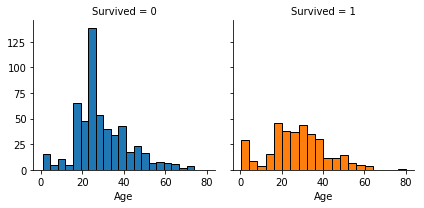

In [235]:
age_plot = sns.FacetGrid(train_set, col='Survived',hue='Survived')
g= age_plot.map(plt.hist, 'Age', bins=20)

In [236]:
train_set[['Survived','Sex']].groupby('Sex').mean()

,Survived
Sex,
0,0.188908
1,0.742038


In [237]:
#Agrupar idades em Bins mais reduzidos.
#Grupos - Baby [0,2]; Child ]2,13]; Teenager ]13,19]; Young Adult]19,40]; Middle Age]40,60]; Senior[>60]

#Check nº survivers "Baby"
train_set[train_set['Age']<=2][['Survived','Age']].groupby('Survived').count()

,Age
Survived,
0,9
1,15


AgeBand: Baby - Taxa de sobrevivência = 62,5%

In [238]:
#Agrupar idades em Bins mais reduzidos.
#Grupos - Baby [0,2]; Child ]2,13]; Teenager ]13,19]; Young Adult]19,40]; Middle Age]40,60]; Senior[>60]

#Check nº survivers "Child"
train_set[(train_set['Age']>2) & (train_set['Age']<=13)][['Survived','Age']].groupby('Survived').count()

,Age
Survived,
0,22
1,29


AgeBand: Child - Taxa de sobrevivência = 56,9%

In [239]:
#Agrupar idades em Bins mais reduzidos.
#Grupos - Baby [0,2]; Child ]2,13]; Teenager ]13,19]; Young Adult]19,40]; Middle Age]40,60]; Senior[>60]

#Check nº survivers "Teenager"
train_set[(train_set['Age']>13) & (train_set['Age']<=19)][['Survived','Age']].groupby('Survived').count()

,Age
Survived,
0,70
1,56


AgeBand: Teenager - Taxa de sobrevivência = 44,4%

In [240]:
#Agrupar idades em Bins mais reduzidos.
#Grupos - Baby [0,2]; Child ]2,13]; Teenager ]13,19]; Young Adult]19,40]; Middle Age]40,60]; Senior[>60]

#Check nº survivers "Young Adult"
train_set[(train_set['Age']>19) & (train_set['Age']<=40)][['Survived','Age']].groupby('Survived').count()

,Age
Survived,
0,352
1,187


AgeBand: Young Adult - Taxa de sobrevivência = 34,7%

In [241]:
#Agrupar idades em Bins mais reduzidos.
#Grupos - Baby [0,2]; Child ]2,13]; Teenager ]13,19]; Young Adult]19,40]; Middle Age]40,60]; Senior[>60]

#Check nº survivers "Middle Age"
train_set[(train_set['Age']>40) & (train_set['Age']<=60)][['Survived','Age']].groupby('Survived').count()

,Age
Survived,
0,79
1,50


AgeBand: Middle Age - Taxa de sobrevivência = 38,8%

In [242]:
#Agrupar idades em Bins mais reduzidos.
#Grupos - Baby [0,2]; Child ]2,13]; Teenager ]13,19]; Young Adult]19,40]; Middle Age]40,60]; Senior[>60]

#Check nº survivers "Senior"
train_set[(train_set['Age']>60)][['Survived','Age']].groupby('Survived').count()

,Age
Survived,
0,17
1,5


AgeBand: Senior - Taxa de sobrevivência = 22,7%

Como vemos, estes Bins apresentam taxas de sobrevivência muito distintas pelo que parecem funcionar como Bins/bandas. Será então criado um novo atributo "AgeBands" e apagado o atributo "Age". Os AgeBands serão numerados de 0 a 5, {0:Baby, 1:Child, 2:Teenager, 3:Young Adult, 4:Middle Age, 5:Senior}.

In [243]:
#Cria novo atributo Age_Bands
cut_points = [0,2,12,19,40,60,100]
#label_names = ['Baby','Child','Teenager','Yound Adult','Middle Age','Senior']
label_names = [0,1,2,3,4,5]
train_set["Age_Bands"] = pd.cut(train_set["Age"],cut_points,labels=label_names)
test_set["Age_Bands"] = pd.cut(test_set["Age"],cut_points,labels=label_names)

#Drop Age Attribute
train_set.drop('Age',axis=1,inplace=True)
test_set.drop('Age',axis=1,inplace=True)

In [244]:
#Guarda ficheiros CSV - Etapa 5
train_set.to_csv("E05_train.csv",index=False)
test_set.to_csv("E05_test.csv",index=False)

### 4.4. Fare

Resta-nos agora um atributo com Missing Values, Fare. Este não só tem 1 valor em falta no test_set, como tem vários valores nulos no train_set. Além disso, parece ter valores superiores ao que seria de esperar pelo valor real dos bilhetes. 

Por esta razão iremos explorar que informação temos à nossa disposição no DataSet para nos auxiliar a identificar a causa deste desvio.

In [245]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_Bands
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500,S,Mr,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,71.2833,C,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,7.9250,S,Miss,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,53.1000,S,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",0,0,0,373450,8.0500,S,Mr,3


O atributo Ticket ainda não foi explorado. Será que os bilhetes são únicos ou permitem identificar grupos familiares?

In [246]:
#What is the number of unique entries on Tickets? Maximum of 891 entries
train_set['Ticket'].nunique()

681

Existem assim 681 números de bilhete únicos em train_set, número inferior aos 891 passageiros. Parece assim que existem bilhetes que surgem de forma duplicada.

Exploremos estes casos.

In [247]:
train_set[train_set['Ticket'].duplicated(keep=False)].head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_Bands
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,53.1000,S,Mrs,3
7,8,0,3,"Palsson, Master. Gosta Leonard",0,3,1,349909,21.0750,S,Master,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,0,2,347742,11.1333,S,Mrs,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1,0,237736,30.0708,C,Mrs,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,1,1,PP 9549,16.7000,S,Miss,1


In [248]:
#Para explorar bilhetes individuais (ex. usar 113803)
train_set[train_set['Ticket']=='349909']

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_Bands
7,8,0,3,"Palsson, Master. Gosta Leonard",0,3,1,349909,21.075,S,Master,0
24,25,0,3,"Palsson, Miss. Torborg Danira",1,3,1,349909,21.075,S,Miss,1
374,375,0,3,"Palsson, Miss. Stina Viola",1,3,1,349909,21.075,S,Miss,1
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,0,4,349909,21.075,S,Mrs,3


In [249]:
#Para identificar os valores médios, mínimos, máximos e desvio padrão, das Fares das 3 classes antes de 
#normalização e preenchimento de null e missing values
train_set[['Pclass','Fare']].groupby('Pclass').describe()

Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

Da lista de bilhetes repetidos é possível verificar que os bilhetes duplicados correspondem a grupos familiares que partilham o mesmo código de bilhete (bem como o mesmo apelido). Adicionalmente encontram-se casos de amigos (mesmo bilhete mas apelidos diferentes). 

Nestes grupos que partilham os bilhetes, o valor de Fare é igual em todos os passageiros e sendo o mesmo superior ao expectável para o valor real histórico conhecido, parece assim que Fare é o valor pago por Ticket e não por passageiro. 

Por forma a garantir um valor de Fare por passageiros correto, parece assim necessário dividir Fare pelo tamanho do grupo familiar. Esta operação deverá ser efetuada antes do preenchimento de Missing ou Null Values.

Calculemos então o tamanho dos grupos familiares.

### 4.4.1. Atributo Family Size

Pela estrutura do Dataset e atributos SibSp e Parch, é possível calcular o tamanho da família como:

Family Size = SibSp + Parch + 1. O + 1 é acrescentado para contabilizar o próprio passageiro, sendo assim o tamanho mínimo da família 1.

In [250]:
#Criar novo atributo Family Size, com número de membros em cada grupo familiar
train_set['Family Size'] = train_set['SibSp']+train_set['Parch']+1
test_set['Family Size'] = test_set['SibSp']+test_set['Parch']+1

In [251]:
#Guarda ficheiros CSV - Etapa 6
train_set.to_csv("E06_train.csv",index=False)
test_set.to_csv("E06_test.csv",index=False)

### 4.4.2. Ajuste do valor de Fare

O valor de Fare será assim ajustado da seguinte forma: 

Fare = Fare/Family Size.

In [252]:
#Cria atributo temporário auxFare para utilizar a informação inicial sem missing values em Feature Engineering
train_set['auxFare'] = train_set['Fare']
test_set['auxFare'] = test_set['Fare']

test_set["auxFare"].fillna(test_set.groupby("Pclass")["auxFare"].transform("median"), inplace=True)
train_set["auxFare"].fillna(train_set.groupby("Pclass")["auxFare"].transform("median"), inplace=True)

#Normaliza a Fare com base nos Family Size: Fare = Fare/Family Size
train_set['Fare']=train_set['Fare']/train_set['Family Size']
test_set['Fare']=test_set['Fare']/test_set['Family Size']

In [253]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_Bands,Family Size,auxFare
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,3.62500,S,Mr,3,2,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,35.64165,C,Mrs,3,2,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,7.92500,S,Miss,3,1,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,26.55000,S,Mrs,3,2,53.1000
4,5,0,3,"Allen, Mr. William Henry",0,0,0,373450,8.05000,S,Mr,3,1,8.0500


### 4.4.3. Preenchimento de Missing e Null Values

Os Missing e Null values serão preenchidos da mesma forma, utilizando o valor mediano do grupo Pclass correspondente.

In [254]:
#Passageiro com Missing Value em Fare antes de preenchimento
test_set[test_set['PassengerId']==1044]

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_Bands,Family Size,auxFare
152,1044,3,"Storey, Mr. Thomas",0,0,0,3701,NaN,S,Mr,5,1,7.8958


In [255]:
test_set["Fare"].fillna(test_set.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train_set["Fare"].fillna(train_set.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [256]:
#Passageiro com Missing Value em Fare após preenchimento
test_set[test_set['PassengerId']==1044]

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_Bands,Family Size,auxFare
152,1044,3,"Storey, Mr. Thomas",0,0,0,3701,7.75,S,Mr,5,1,7.8958


In [257]:
train_set[train_set['Fare']==0].head(2)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_Bands,Family Size,auxFare
179,180,0,3,"Leonard, Mr. Lionel",0,0,0,LINE,0.0,S,Mr,3,1,0.0
263,264,0,1,"Harrison, Mr. William",0,0,0,112059,0.0,S,Mr,3,1,0.0


In [258]:
#Atribuir valores às Fares iguais a 0, com base nos valores medianos da Pclass
for i in range(1,4):
    train_set.loc[(train_set['Fare'] == 0) & (train_set['Pclass']==i),'Fare'] = train_set[(train_set['Fare'] > 0) & (train_set['Pclass']==i)]['Fare'].median()
    test_set.loc[(test_set['Fare'] == 0) & (test_set['Pclass']==i),'Fare'] = test_set[(test_set['Fare'] > 0) & (test_set['Pclass']==i)]['Fare'].median()

In [259]:
train_set[train_set['Fare']==0].head(2)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_Bands,Family Size,auxFare


Após normalização e preenchimento de Null e Missing Values, vejamos novamente os valores de Fare.

In [260]:
#Para identificar os valores médios, mínimos, máximos e desvio padrão, das Fares das 3 classes.
train_set[['Pclass','Fare']].groupby('Pclass').describe()

Fare                                                               
        count       mean        std       min    25%    50%    75%       max
Pclass                                                                      
1       216.0  53.747129  60.445408  5.000000  27.50  35.00  52.00  512.3292
2       184.0  13.122745   7.702424  2.875000  10.50  13.00  13.00   73.5000
3       491.0   8.157893   6.287459  1.132143   6.75   7.75   8.05   56.4958

Através da tabela anterior podemos verificar que após limpeza e tratamento de Fare foi possível reduzir significativamente o desvio padrão e aproximar os valores dos reais custos dos bilhetes por classe:

1ª classe: Parlor Suite (ex. Suite Presidencial) - até 870£. Cama - 30£.
2ª classe: 12£
3ª classe: 3£ a 8£.

In [261]:
#Guarda ficheiros CSV - Etapa 7
train_set.to_csv("E07_train.csv",index=False)
test_set.to_csv("E07_test.csv",index=False)

### 4.4.4. Conversão de Fares para Bins

Por forma a eliminar os Outliers identificados anteriormente e para passar o atributo de contínuo para ordinal, Fare será dividida em Bins, neste caso e por estimativa, em 5 bins distintos, numerados de 0 a 4.

In [262]:
### Converter Fare para Bins
train_set['FareBins'] = pd.qcut(train_set['Fare'], 5,labels=[0,1,2,3,4]).astype(float)
test_set['FareBins'] = pd.qcut(test_set['Fare'], 5,labels=[0,1,2,3,4]).astype(float)

In [263]:
#Guarda ficheiros CSV - Etapa 8
train_set.to_csv("E08_train.csv",index=False)
test_set.to_csv("E08_test.csv",index=False)

In [264]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_Bands,Family Size,auxFare,FareBins
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,3.62500,S,Mr,3,2,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,35.64165,C,Mrs,3,2,71.2833,4.0
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,7.92500,S,Miss,3,1,7.9250,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,26.55000,S,Mrs,3,2,53.1000,3.0
4,5,0,3,"Allen, Mr. William Henry",0,0,0,373450,8.05000,S,Mr,3,1,8.0500,2.0


## 5. Feature Engineering

Embora alguma Feature Engineering tenha sido feita anteriormente no capítulo 4 para suportar as tarefas de Data Cleaning, neste capítulo será criado um novo atributo.

Este novo atributo (Family Survival) foi criado para melhorar a performance dos modelos de predição, já que sem este, não consegui ultrapassar os 78,5% de overall accuracy em Submissões Kaggle. Utilizando este atributo, foi-me possível alcançar 81,8%.

Anteriormente condensámos informação de número de familiares de cada passageiro no atributo Family Size. No entanto, este atributo não contém informação relativa à sobrevivência desses mesmos familiares, que poderá ser conhecida. Com esta informação, deverá ser possível melhorar as previsões, já que se verifica que tipicamente nos grupos familiares/de amizade existe tendência de partilharem todos o mesmo destino.

Para determinar estes grupos familiares/de amigos, serão utilizados três atributos: Survived (no caso de train_set), Ticket, Fare e Last Name. Last Name é extraído de Name e em conjunto com Ticket permite identificar grupos de familiares (partilham apelido e bilhete) e amigos (partilham apenas bilhete). Quando combinado com Fare, podemos também, com alguma margem de erro, identificar grupos de familiares que não partilham o mesmo bilehte.

esses grupos, é verificado se algum sobreviveu. Se sim, considera-se que Family Survival é 1 para todo o grupo. Caso nenhum sobreviva, o valor escolhido é 0. Caso não existam dados de sobrevivência correspondente ao grupo familiar (no caso de um grupo exclusivo de test_set), então é mantido o valor de inicialização intermédio (neutro) de 0,5.

### 5.1. Preparar DataFrames

Para este atributo ser corretamente definido, é necessário utilizar todos os dados de train_set e test_set. Assim, estes serão combinados num novo DataFrame, combined. O atributo Survived será também extendido ao test_set, inicializado a 0,5.

In [265]:
#Coloca Survived no final do DataFrame
train_set = train_set[['PassengerId','Pclass','Name','Sex','SibSp','Parch','Ticket','Fare','Embarked','Title','Age_Bands','Family Size','auxFare','FareBins','Survived']]
test_set['Survived']=""

#test_set["Fare"].fillna(test_set.groupby("Pclass")["Fare"].transform("median"), inplace=True)

#Cria um DataFrame combinado para analisar os grupos que partilham bilhete
frames = [train_set,test_set]
combined = pd.concat(frames)

In [266]:
#Transforma Survived em 0 - No, 0.5 - Missing (middle value) or 1 - Yes.
combined.replace({'No':0,'':0.5,'Yes':1},inplace=True)

In [267]:
#Show all duplicated Ticket entries
combined[combined['Ticket'].duplicated(keep=False)]['Survived'].count()

596

Podemos verificar que dos 1309 passageiros, 596 têm bilhetes duplicados. Isto expande significativamente face aos 344 duplicados considerando apenas o train_set.

In [268]:
#Cria uma coluna Family Survival com valor por defeito 0.5
combined['Family Survival']=0.5

### 5.2. Cálculo de Family Survival

Estamos então em condições de calcular Family Survival:

In [269]:
#Averigua sobrevivência de grupos familiares (por apelido e Fare)

#Extrai último nome do atributo Name
combined['Last Name'] = combined['Name'].apply(lambda x: str.split(x, ",")[0])

#Itera por todos os grupos de bilhetes únicos
for _, grp_df in combined.groupby(['Last Name','auxFare']):
    #Itera por todas as entradas/passageiros de cada grupo de bilhetes únicos
    if (len(grp_df) != 1):
        for indx, row in grp_df.iterrows():
            # Determina se algum passageiro sobreviveu
            smax = grp_df.drop(indx)['Survived'].max()
            smin = grp_df.drop(indx)['Survived'].min()

            #Obtém PassengerId correspondente à row
            passID = row['PassengerId']

            ## Caso haja sobreviventes, coloca feature a 1
            if (smax==1.0): 
                combined.loc[combined['PassengerId'] == passID, 'Family Survival'] = 1
                ## Caso não haja sobreviventes, coloca feature a 0
            elif (smin==0.0): 
                combined.loc[combined['PassengerId'] == passID, 'Family Survival'] = 0

#Itera por todos os grupos de bilhetes únicos
for _, grp_df in combined.groupby(['Ticket']):
    #Itera por todas as entradas/passageiros de cada grupo de bilhetes únicos
    if (len(grp_df) != 1):
        for indx, row in grp_df.iterrows():
            if (row['Family Survival'] == 0) | (row['Family Survival']== 0.5):
                # Determina se algum passageiro sobreviveu
                smax = grp_df.drop(indx)['Survived'].max()
                smin = grp_df.drop(indx)['Survived'].min()

                #Obtém PassengerId correspondente à row
                passID = row['PassengerId']

                ## Caso haja sobreviventes, coloca feature a 1
                if (smax==1.0): 
                    combined.loc[combined['PassengerId'] == passID, 'Family Survival'] = 1
                    ## Caso não haja sobreviventes, coloca feature a 0
                elif (smin==0.0): 
                    combined.loc[combined['PassengerId'] == passID, 'Family Survival'] = 0

In [270]:
#Verificar o resultado no final do Dataframe combinado
combined[combined['Ticket'].duplicated(keep=False)].head(10)

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_Bands,Family Size,auxFare,FareBins,Survived,Family Survival,Last Name
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,35.641650,C,Mrs,3,2,71.2833,4.0,1.0,0.5,Cumings
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,26.550000,S,Mrs,3,2,53.1000,3.0,1.0,0.0,Futrelle
6,7,1,"McCarthy, Mr. Timothy J",0,0,0,17463,51.862500,S,Mr,4,1,51.8625,4.0,0.0,0.5,McCarthy
7,8,3,"Palsson, Master. Gosta Leonard",0,3,1,349909,4.215000,S,Master,0,5,21.0750,0.0,0.0,0.0,Palsson
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,0,2,347742,3.711100,S,Mrs,3,3,11.1333,0.0,1.0,1.0,Johnson
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1,0,237736,15.035400,C,Mrs,2,2,30.0708,3.0,1.0,0.0,Nasser
10,11,3,"Sandstrom, Miss. Marguerite Rut",1,1,1,PP 9549,5.566667,S,Miss,1,3,16.7000,0.0,1.0,1.0,Sandstrom
13,14,3,"Andersson, Mr. Anders Johan",0,1,5,347082,4.467857,S,Mr,3,7,31.2750,0.0,0.0,0.0,Andersson
16,17,3,"Rice, Master. Eugene",0,4,1,382652,4.854167,Q,Master,0,6,29.1250,0.0,0.0,0.0,Rice
18,19,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",1,1,0,345763,9.000000,S,Mrs,3,2,18.0000,2.0,0.0,0.0,Vander Planke


Com o novo atributo Family Survival calculado, este pode ser adicionado a train_set e test_set.

In [271]:
#Adicionar Familty Sur DataFrame combinado para os subDataFrames train_set e test_set
train_set['Family Survival'] = (combined.iloc[:len(train_set)]['Family Survival'].values).astype(float)
test_set['Family Survival'] = (combined.iloc[len(train_set):]['Family Survival'].values).astype(float)

C:\Users\migue\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### 5.3. Eliminar atributos

Atributos como Name, Ticket, Title e Fare foram utilizados para a preparação de outros atributos com maior relevância, como AgeBands, Family Survival, FareBins. Podem ser agora removidos, o que permitirá também reavaliar o mapa de calor dos atributos de train_set.

In [272]:
#Apagar atributo Name
train_set = train_set.drop(['Name','Ticket','Title','auxFare','Fare'],axis=1)
test_set = test_set.drop(['Name','Ticket','Title','auxFare','Fare'],axis=1)

In [273]:
train_set.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Age_Bands,Family Size,FareBins,Survived,Family Survival
0,1,3,0,1,0,S,3,2,0.0,0,0.5
1,2,1,1,1,0,C,3,2,4.0,1,0.5
2,3,3,1,0,0,S,3,1,2.0,1,0.5
3,4,1,1,1,0,S,3,2,3.0,1,0.0
4,5,3,0,0,0,S,3,1,2.0,0,0.5


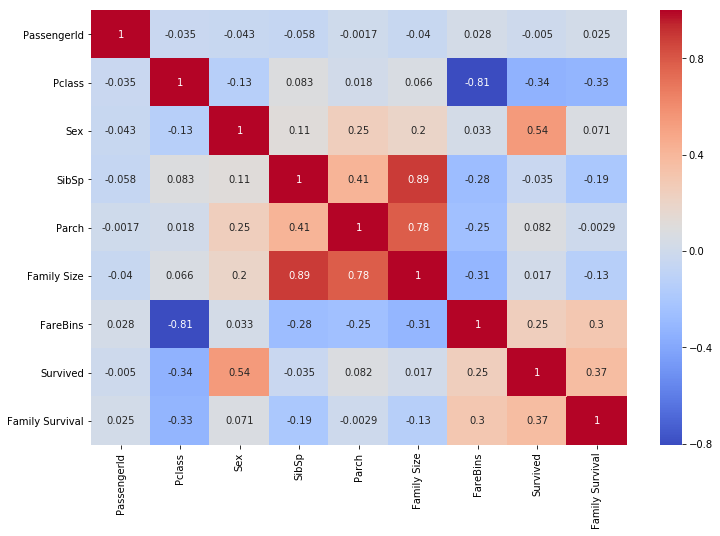

In [274]:
fig=plt.figure(figsize=(12,8))
sns.heatmap(train_set.corr(),cmap='coolwarm',annot=True)

O mapa de calor permite-nos tirar novas conclusões:
 - Family Survival tem uma forte correlação com o atributo Survived. Isto seria de esperar já que todos os dados de train_set têm informação relativa à sobrevivência dos passageiros. Ainda assim, o facto de apenas serem considerados grupos com >1 membro significa que não temos uma correlação excessiva que provocaria Overfit no train_set e assim perda de eficiência na previsão de sobrevivência dos passageiros contidos em test_set (pude verificar este overfitting a ocorrer quando implementei este atributo incorretamente);
 - FareBins têm igualmente uma boa correlação com Survived;
 - Os atributos Family Size, Parch e SibSp têm correlações fracas. Para identificar a causa, Family Size será analisado de seguida.

In [275]:
train_set[['Survived','Family Size']].groupby('Family Size').mean()

,Survived
Family Size,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


A percentagem de sobreviventes em passageiros que viajam sem família identificada é de 30%. Esta percentagem sobe depois para valores entre 55-72% em passageiros que viajam com 2 a 4 familiares. Passageiros com 5 ou mais familiares no entanto têm percentagens de sobrevivência muito reduzidas, o que explica a correlação próxima de 0, já que a evolução da percentagem começa por subir com Family Size, reduzindo depois com o continuar do aumentar.

Family Size será dividido em 3 Bins: {Alone:0, Small:1, Large:2}, passando a uma variável categórica, mais útil para os modelos que serão utilizados.

In [276]:
#Cria novo atributo Family Type
cut_points = [0,1,4,12]
#label_names = ['Alone','Small','Large']
label_names = [0,1,2]
train_set["Family Type"] = pd.cut(train_set["Family Size"],cut_points,labels=label_names)
test_set["Family Type"] = pd.cut(test_set["Family Size"],cut_points,labels=label_names)

#Drop Age Attribute
train_set.drop('Family Size',axis=1,inplace=True)
test_set.drop('Family Size',axis=1,inplace=True)

Por fim, são eliminados os restantes atributos com pouca ou nenhuma correlação com Survived, SibSp, Parch, Embarked e PassengerId.

In [277]:
#Deixa cair atributos pouco relevantes
train_set.drop(['SibSp','Parch','Embarked','PassengerId'],axis=1,inplace=True)
test_set.drop(['SibSp','Parch','Embarked'],axis=1,inplace=True)

In [278]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass             891 non-null int64
Sex                891 non-null int32
Age_Bands          891 non-null category
FareBins           891 non-null float64
Survived           891 non-null int64
Family Survival    891 non-null float64
Family Type        891 non-null category
dtypes: category(2), float64(2), int32(1), int64(2)
memory usage: 33.4 KB


Vejamos uma última vez o Heatmap dos atributos numéricos finais considerados para uso dos modelos, bem como o aspeto dos DataFrames train_set e test_set.

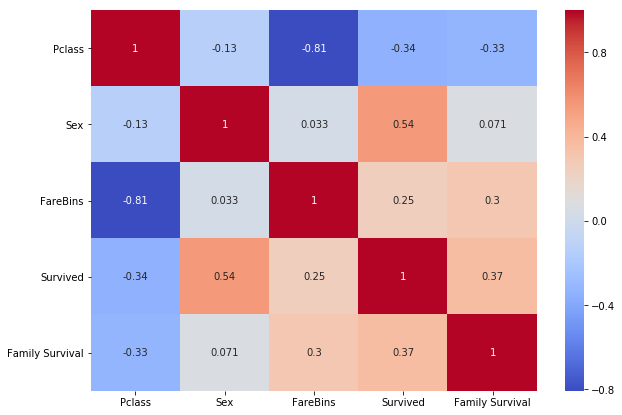

In [279]:
fig=plt.figure(figsize=(10,7))
sns.heatmap(train_set.corr(),cmap='coolwarm',annot=True)

In [280]:
train_set.head()

,Pclass,Sex,Age_Bands,FareBins,Survived,Family Survival,Family Type
0,3,0,3,0.0,0,0.5,1
1,1,1,3,4.0,1,0.5,1
2,3,1,3,2.0,1,0.5,0
3,1,1,3,3.0,1,0.0,1
4,3,0,3,2.0,0,0.5,0


In [281]:
test_set.head()

,PassengerId,Pclass,Sex,Age_Bands,FareBins,Survived,Family Survival,Family Type
0,892,3,0,3,1.0,,0.5,0
1,893,3,1,4,0.0,,0.5,1
2,894,2,0,5,2.0,,0.5,0
3,895,3,0,3,2.0,,0.5,0
4,896,3,1,3,0.0,,1.0,1


In [282]:
#Guarda ficheiros CSV - Etapa 9
train_set.to_csv("E09_train.csv",index=False)
test_set.to_csv("E09_test.csv",index=False)

## 6. Modelação Preditiva

Com os Datasets prontos, resta executar o passo final, a escolha, preparação e aplicação de modelos preditivos.

Este é um problema Supervisionado de Classificação, pelo que podemos considerar como potenciais candidatos:
 - K Nearest Neighbours;
 - Decision Tree;
 - Random Forest;
 - Suport Vector Machine (SVM);
 - Regressão Logística.
 
Estes serão descritos e aplicados em subcapítulos específicos. No final, serão comparados entre si, recorrendo às métricas aplicáveis a este problema em particular. Estas métricas (Accuracy, Precision, Recall, Specificity, F1-Score, ROC AUC (Receiver Operating Characteristic - Area Under the Curve) e PRC AUC (Precision Recall Curve) serão guardadas em DataFrames específicos, bem como a informação para desenho dos gráficos ROC e PRC.

Por forma a garantir que a avaliação não é efetuada sobre uma amostra de treino/avaliação que não sejam representativos, será utilizado K-fold Cross Validation, com k = 10.

In [283]:
#Cria DataFrame para agregar todos as métricas
columns = ['Accuracy','Precision','Recall','Specificity','F1-Score','ROC AUC','PRC AUC']
rows = ['Baseline1','Baseline2','Baseline3','KNN','Decision Tree','Random Forest','Naive Bayes','SVM','Logistic Regression','XGB']
DF_results = pd.DataFrame(index=rows,columns=columns)

#Cria DataFrame para as curvas ROC e PRC
columns = ['Recall','Precision','False Positive Rate','True Positive Rate','ROC AUC','PRC AUC']
rows = ['Baseline1','Baseline2','Baseline3','KNN','Decision Tree','Random Forest','Naive Bayes','SVM','Logistic Regression','XGB']
DF_AUC = pd.DataFrame(index=rows,columns=columns)

In [284]:
#Prepara dados para modelos - cria variáveis X e Y do Dataset de treino
X_train = train_set.drop(['Survived'],axis=1)
Y_train = train_set['Survived']

In [285]:
# Definição de funções para cálculo de parâmetros e representação gráfica de ROC e PRC:
def calc_param(classifier):
    tprs = []
    aucs = []
    aucs_prc = []
    y_real = []
    y_proba = []
    mean_fpr = np.linspace(0, 1, 100)

    i = 0
    #Calcula fpr (False Positive Rate) e tpr (True Positive Rate)
    for train, test in cv.split(X_train,Y_train):
        #Para TPR e FPR
        probas_ = classifier.fit(X_train.iloc[train], Y_train.iloc[train]).predict_proba(X_train.iloc[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(Y_train[test], probas_[:, 1],pos_label=1)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        #Para Recall e Precision
        y_real.append(Y_train.iloc[test])
        y_proba.append(probas_[:,1])
        
        i += 1
    
    #Para ROC
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_roc_auc = auc(mean_fpr, mean_tpr)
    
    #Para PRC
    y_real = np.concatenate(y_real)
    y_proba = np.concatenate(y_proba)
    mean_precision, mean_recall, _ = precision_recall_curve(y_real, y_proba,pos_label=1)
    mean_prc_auc = auc(mean_recall,mean_precision)
    return (mean_tpr, mean_fpr,mean_roc_auc,mean_recall,mean_precision,mean_prc_auc)

In [286]:
#Função para cálculo das métricas e preenchimento de Dataframe/Matriz de métricas
def calc_matrix(aux):
    #Calcula a Accuracy
    accuracy = (conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix.sum())
    print('Accuracy: {:05.2f}%\n'.format(accuracy*100))
    DF_results.loc[aux]['Accuracy'] = accuracy

    #Calcula a Precision
    if conf_matrix[:,0].sum() == 0:
        precision = 0
        print('Precision: {:05.2f}%\n'.format(precision*100))
        DF_results.loc[aux]['Precision'] = precision
    else:
        precision = (conf_matrix[0][0])/(conf_matrix[:,0].sum())
        print('Precision: {:05.2f}%\n'.format(precision*100))
        DF_results.loc[aux]['Precision'] = precision

    #Calcula o Recall
    recall = (conf_matrix[0][0])/(conf_matrix[0,:].sum())
    print('Recall: {:05.2f}%\n'.format(recall*100))
    DF_results.loc[aux]['Recall'] = recall
    
    #Calcula a Specificity
    specificity = (conf_matrix[1][1])/(conf_matrix[1,:].sum())
    print('Specificity: {:05.2f}%\n'.format(specificity*100))
    DF_results.loc[aux]['Specificity'] = specificity
    
    #Calcula o F1 score
    if precision+recall == 0:
        F1_score = 0
        print('F1 Score: {:05.2f}%\n'.format(F1_score*100))
        DF_results.loc[aux]['F1-Score'] = F1_score
    else:
        F1_score = 2*(precision*recall)/(precision+recall)
        print('F1 Score: {:05.2f}%\n'.format(F1_score*100))
        DF_results.loc[aux]['F1-Score'] = F1_score
    
    if aux != 'Baseline1' and aux != 'Baseline2' and aux != 'Baseline3':     

        #Calcula ROC (Receiver Operatin Characteristic) - Area Under the Curve
    #    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_score)
    #    roc_auc = auc(false_positive_rate, true_positive_rate)
        print('ROC AUC: {:05.2f}%\n'.format(mean_roc_auc*100))
        DF_results.loc[aux]['ROC AUC'] = mean_roc_auc
        DF_AUC.loc[aux]['False Positive Rate'] = mean_fpr
        DF_AUC.loc[aux]['True Positive Rate'] = mean_tpr
        DF_AUC.loc[aux]['ROC AUC'] = mean_roc_auc

        #Calcula PRC (Precision Recall Curve) - Area Under the Curve
        precision, recall, thresholds = precision_recall_curve(Y_train,predictions)
        prc_auc = auc(recall, precision)
        print('PRC AUC: {:05.2f}%\n'.format(prc_auc*100))
        DF_results.loc[aux]['PRC AUC'] = mean_prc_auc
        DF_AUC.loc[aux]['Recall'] = mean_recall
        DF_AUC.loc[aux]['Precision'] = mean_precision
        DF_AUC.loc[aux]['PRC AUC'] = mean_prc_auc

In [287]:
#Plot do ROC
def plot_roc(mean_fpr,mean_tpr,mean_roc_auc):

    plt.figure(figsize=(18,10))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f)' % (mean_roc_auc),
             lw=2, alpha=.8)

    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [288]:
# Plot do PRC
def plot_prc(mean_recall,mean_precision,mean_prc_auc):

    plt.figure(figsize=(18,10))
    plt.plot([0, 1], [0.5, 0.5], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)
    plt.plot(mean_recall, mean_precision, color='b',
             label=r'Mean ROC (AUC = %0.2f)' % (mean_prc_auc),
             lw=2, alpha=.8)

    plt.xlim([0, 1.01])
    plt.ylim([0.3, 1.01])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PRC Curve')
    plt.legend(loc="lower right")
    plt.show()

### 6.1. Baseline

Para que possamos comparar o nosso Pipeline e classificadores, é conveniente definir Baselines para comparação.

As duas estratégias principais são:
 - Random prediction algorithm: algoritmo que prevê a classificação aleatoriamente;
 - Zero rule algorithm: prevê todos os casos como sendo da classe maioritária.
 
Apesar de ambas as estratégias serem válidas, neste projecto considerarei como Baselines:
 - (1) Zero rule aplicado exclusivamente a Survived: nenhum passageiro sobrevive;
 - (2) Zero rule aplicado com variável Survived e Sex: Todas as mulheres sobrevivem, todos os homens perdem a vida;
 - (3) Previsão com maior accuracy feita com Weka, com DataSet original (sem manipulação).

### 6.1.1. Baseline 1 - Nenhum passageiro sobrevive

In [289]:
# Cria uma cópia do DataFrame train_set para manipulação de 'Survived'
aux_DF = train_set.copy(deep=True)
# Coloca coluna 'Survived ' a 0
aux_DF['Survived'] = 0
y_all_perish = aux_DF['Survived']

#Gera matriz de confusão
conf_matrix = confusion_matrix(Y_train,y_all_perish,labels=[1,0])
print(conf_matrix)

#Calcula e armazena métricas
aux = 'Baseline1'
calc_matrix(aux)

[[  0 342]
 [  0 549]]
Accuracy: 61.62%

Precision: 00.00%

Recall: 00.00%

Specificity: 100.00%

F1 Score: 00.00%



### 6.1.2. Baseline 2 - Todas as mulheres sobrevivem. Todos os homens perdem a vida.

In [290]:
# Cria uma cópia do DataFrame train_set para manipulação de 'Survived'
aux_DF = train_set.copy(deep=True)
# Coloca coluna 'Survived ' a 0
aux_DF.loc[aux_DF['Sex']==0,'Survived']=0
aux_DF.loc[aux_DF['Sex']==1,'Survived']=1
y_all_perish = aux_DF['Survived']

#Gera matriz de confusão
conf_matrix = confusion_matrix(Y_train,y_all_perish,labels=[1,0])
print(conf_matrix)

#Calcula e armazena métricas
aux = 'Baseline2'
calc_matrix(aux)

[[233 109]
 [ 81 468]]
Accuracy: 78.68%

Precision: 74.20%

Recall: 68.13%

Specificity: 85.25%

F1 Score: 71.04%



### 6.1.3. Baseline 3 - Melhor previsão por Weka, com DataSet não manipulado

In [291]:
#Matriz de confusão gerada por Weka com Dataset inalterado
conf_matrix=np.array([[219,123],[45,504]])

#Calcula e armazena métricas
aux = 'Baseline3'
calc_matrix(aux)

Accuracy: 81.14%

Precision: 82.95%

Recall: 64.04%

Specificity: 91.80%

F1 Score: 72.28%



### 6.2. Cross Validation (K-fold)

Um modelo tem de ser treinado sobre um conjunto de dados. Este modelo não deverá no entanto ser avaliado pelo resultado de previsões efetuadas sobre estes mesmos dados, já que o modelo já os "conhece" e por isso irá obter resultados superiores à realidade. 

Por esta razão, os dados são tipicamente divididos em 2 conjuntos de dados distintos, dados de treino e dados de avaliação. Adicionalmente, poderão também ser segregados dados para efetuar um teste adicional, situação que se verifica no caso da competição Kaggle do Titanic, que tem um conjunto de dados para treino e avaliação (train_set) e dados para teste (test_set).

Esta divisão é normalmente efetuada recolhendo amostras aleatórias do Dataset, até constituir uma % do conjunto inicial (valores típicos são por exemplo 70% dados para treino e 30% dados para teste). Esta abordagem poderá ser suficiente em Datasets com elevadas dimensões, em que o risco de que as amostras de treino e avaliação não sejam representativas da população/amostra global é baixo. 

Se a dimensão do Dataset for limitada, deverão ser utilizadas estratégias mais sofisticadas para o treino e avaliação do desempenho dos modelos, como K-fold Cross Validation.

Em K-fold Cross Validation, este processo de divisão do conjunto por subconjuntos de dados de treino e avaliação é efetuado k vezes, sendo os resultados finais obtidos através da média dos resultados individuais. Estes k subconjuntos de avaliação são escolhidos de forma a que nunca se intersetem, isto é, uma amostra individual será utilizada para treino k-1 vezes e para avaliação apenas (mas garantidamente) 1 vez. Isto tem a vantagem de permitir utilizar todas as amostras individuais para treino e avaliação, garantindo que mesmo datasets reduzidos podem ser avaliados de uma forma representantiva.

A escolha do valor k é muito importante para uma avaliação fidedigna da capacidade do modelo treinado. Valores que tendem a funcionar bem na generalidade dos problemas são k=5 ou k=10. Neste trabalho, será utilizado o valor k=10.

![alt text](Images/K-fold_cross_validation_EN.jpg "K-CV")

### 6.3. kNN (k Nearest Neighbours)

k Nearest Neighbours é um algoritmo de classificação, aplicável em problemas Supervisionados (embora possa também ser aplicado em problemas de regressão).

Neste modelo, é calculada a distância de cada amostra para a qual queremos prever a variável target em relação às amostras que constituem o conjunto de treino. As classes das k amostras mais perto são depois utilizadas para prever a classe da nova amostra a prever.

Este método apresenta as seguintes vantagens:
 - Algoritmo simples de explicar;
 - Versátil, podendo ser utilizado para classificação ou regressão;
 - Muito rápido.
 
Tem no entanto importantes desvantagens:
 - Tem elevado custo computacional, que aumenta com o número de atributos a utilizar, que são todos armazenados em memória;
 - Sensível a atributos pouco relevantes;
 - Sensível a atributos não normalizados.
 
Como pressuposto para o trabalho, foi sugerido que fosse utilizado k=10.

![alt text](Images/KNN.jpg "K-CV")

In [292]:
classifier = KNeighborsClassifier(n_neighbors=10)
scoring = 'accuracy'
score = cross_val_score(classifier,X_train,Y_train,cv=10,scoring=scoring)
print(score)

[0.81111111 0.88888889 0.75280899 0.85393258 0.87640449 0.82022472
 0.84269663 0.76404494 0.84269663 0.84090909]


In [293]:
# Average result of all folds for kNN - Best 79.14
round(np.mean(score)*100,2)

82.94

In [294]:
#Calcula Matrix de Confusão
classifier = KNeighborsClassifier(n_neighbors=10)
predictions = cross_val_predict(classifier,X_train,Y_train,cv=10,)

conf_matrix = confusion_matrix(Y_train,predictions,labels=[1,0])
print(conf_matrix)

[[232 110]
 [ 42 507]]


In [295]:
cv = StratifiedKFold(n_splits=10,random_state=101)
aux = 'KNN'
mean_tpr, mean_fpr,mean_roc_auc,mean_recall,mean_precision,mean_prc_auc = calc_param(classifier)
calc_matrix(aux)

Accuracy: 82.94%

Precision: 84.67%

Recall: 67.84%

Specificity: 92.35%

F1 Score: 75.32%

ROC AUC: 87.67%

PRC AUC: 82.43%



In [296]:
#Plot do ROC
#plot_roc(mean_fpr,mean_tpr,mean_roc_auc)

In [297]:
#Plot do PRC
#plot_prc(mean_recall,mean_precision,mean_prc_auc)

### 6.4. Decision Tree

A árvore de decisão (Decision Tree) é um método de classificação que assenta no uso da informação ganha (IG) e entropia. O objetivo deste tipo de métodos é a optimização da IG, reduzindo ao máximo a entropia desse segmento. Podemos encarar a entropia como uma medida de impureza, tendo impureza máxima quando existem 50/50 casos de cada tipo de classificação possível. O nosso objetivo é encontrar os caminhos ou decisões, que originam situações de pureza, ou seja em que temos apenas um tipo de classificação possível. Para tal, são tomadas "decisões". Utilizando como o exemplo a imagem que se segue, essas decisões podem ser: Se o balanço de conta for igual ou maior a 50k e a idade igual ou superior a 45, então temos 100% de probabilidade de não ter um Write-off. 

Generalizando, numa árvore de decisão, esta segmentação é efetuada ao longo de vários atributos, até garantir que a entropia é suficientemente reduzida. O resultado final é uma estrutura de tipo árvore, com nós (pontos de divisão por um determinado atributo) e folhas (classificação e correspondente probabilidade).

As grandes vantagens das árvores de decisão são:
 - São fáceis de compreender e explicar e permitem uma representação gráfica da decisão;
 - Robustas e fáceis de utilizar;
 - Requerem pouco dados mas lidam igualmente bem com quantidades elevadas de dados;
 - Não é susceptível a enviesar devido a Outliers.

Por outro lado, as árvores de decisão apresentam algumas decisões como:
 - São susceptíveis a overfitting, caso existam muitos atributos e se permita a criação de muitos nós;
 - Podem tender a convergir para pontos ótimos locais;
 - Treino lento.

![alt text](Images/Decision_Tree.jpg "Decision Tree")

In [298]:
classifier = DecisionTreeClassifier(random_state=101)
scoring = 'accuracy'
score = cross_val_score(classifier,X_train,Y_train,cv=10,scoring=scoring)
print(score)

[0.86666667 0.83333333 0.76404494 0.86516854 0.87640449 0.84269663
 0.85393258 0.82022472 0.87640449 0.85227273]


In [299]:
# Average result of all folds for Decision Tree - Best 81.6
round(np.mean(score)*100,2)

84.51

In [300]:
#Calcula Matrix de Confusão
classifier = DecisionTreeClassifier(random_state=101)
predictions = cross_val_predict(classifier,X_train,Y_train,cv=10)
conf_matrix = confusion_matrix(Y_train,predictions,labels=[1,0])
print(conf_matrix)

[[248  94]
 [ 44 505]]


In [301]:
cv = StratifiedKFold(n_splits=10,random_state=101)
aux = 'Decision Tree'
mean_tpr, mean_fpr,mean_roc_auc,mean_recall,mean_precision,mean_prc_auc = calc_param(classifier)
calc_matrix(aux)

Accuracy: 84.51%

Precision: 84.93%

Recall: 72.51%

Specificity: 91.99%

F1 Score: 78.23%

ROC AUC: 87.07%

PRC AUC: 84.00%



A grande vantagem das Decision Tree é podermos visualizá-las de forma gráfica. Esta será representada de seguida.

In [302]:
import graphviz 
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydot 

features = list(X_train.columns[0:])

In [303]:
features

['Pclass', 'Sex', 'Age_Bands', 'FareBins', 'Family Survival', 'Family Type']

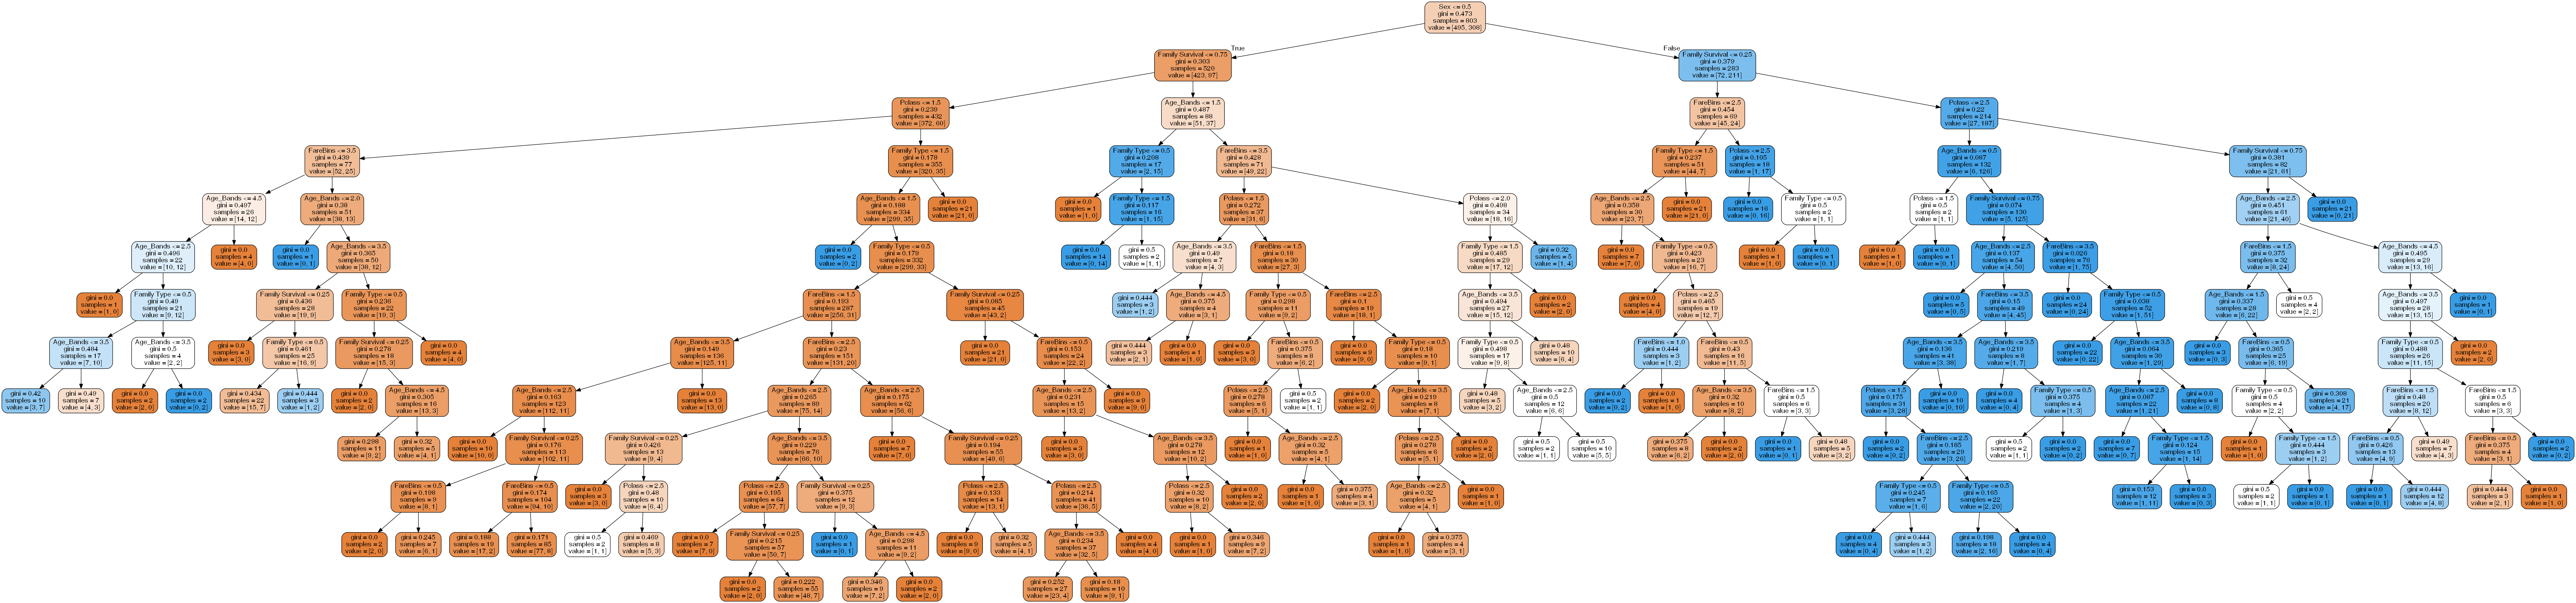

In [304]:
dot_data = StringIO()  
export_graphviz(classifier, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

Devido à elevada dimensão que torna impossível a visualização com este Notebook, a imagem PNG equivalente será enviada com o Notebook.

In [305]:
#Plot do ROC
#plot_roc(mean_fpr,mean_tpr,mean_roc_auc)

In [306]:
#Plot do PRC
#plot_prc(mean_recall,mean_precision,mean_prc_auc)

### 6.5. Random Forest

Random Forest é um método que utiliza as Decision Trees ao mesmo tempo que introduz alguma aleatoriedade para combater as desvantagens anteriormente apresentadas desses métodos.

Este método funciona através da criação de várias Decision Trees nas quais em vez de se utilizar sempre o atributo que gerará uma maior redução de entropia, é utilizado o atributo que gera a maior redução de entropia de entre um subconjunto aleatório de atributos.

São depois criadas n destas árvores de decisão com aleatoriedade, sendo os resultados finais do modelo aqueles que mais vezes surgem como os "melhores" caminhos.

As principais vantagens deste método são:
 - Pode ser utilizado tanto em problemas de regressão como de classificação;
 - Fácil de utilizar;
 - Robusto e pouco propenso a Overfitting;

Estas vantagens no entanto vêm à custa de:
 - Maior custo computacional, sendo o modelo rápido a treinar mas lento a classificar novas amostras, quando são utilizadas muitas árvores de decisão;
 - De mais difícil explicação que as árvores de decisão, não sendo graficamente representável.

![alt text](Images/Random_Forest.png "Random Forest")

In [307]:
classifier = RandomForestClassifier(n_estimators=10,random_state=101)
scoring = 'accuracy'
score = cross_val_score(classifier,X_train,Y_train,cv=10,scoring=scoring)
print(score)

[0.8        0.82222222 0.7752809  0.87640449 0.88764045 0.83146067
 0.85393258 0.78651685 0.83146067 0.86363636]


In [308]:
# Average result of all folds for Random Forest - Best 83.51
round(np.mean(score)*100,2)

83.29

In [309]:
#Calcula Matrix de Confusão
classifier = RandomForestClassifier(n_estimators=10,random_state=101)
predictions = cross_val_predict(classifier,X_train,Y_train,cv=10)
conf_matrix = confusion_matrix(Y_train,predictions,labels=[1,0])
print(conf_matrix)

[[251  91]
 [ 58 491]]


In [310]:
cv = StratifiedKFold(n_splits=10,random_state=101)
aux = 'Random Forest'
mean_tpr, mean_fpr,mean_roc_auc,mean_recall,mean_precision,mean_prc_auc = calc_param(classifier)
calc_matrix(aux)

Accuracy: 83.28%

Precision: 81.23%

Recall: 73.39%

Specificity: 89.44%

F1 Score: 77.11%

ROC AUC: 88.53%

PRC AUC: 82.42%



In [311]:
# Grid Search Random Forest - comentada pois já foram identificados os melhores parâmetros
#from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
#random_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap}

In [312]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(X_train, Y_train)

In [313]:
#rf_random.best_params_

In [314]:
#{'n_estimators': 1400,
# 'min_samples_split': 2,
# 'min_samples_leaf': 1,
# 'max_features': 'auto',
# 'max_depth': 40,
# 'bootstrap': False}

In [315]:
#Calcula Matrix de Confusão
#classifier = RandomForestClassifier(n_estimators=1400,random_state=101,min_samples_split=2, min_samples_leaf=1,max_features='auto',max_depth=40,bootstrap=False)
#predictions = cross_val_predict(classifier,X_train,Y_train,cv=10)
#conf_matrix = confusion_matrix(Y_train,predictions,labels=[1,0])
#print(conf_matrix)

In [316]:
#cv = StratifiedKFold(n_splits=10,random_state=101)
#aux = 'Random Forest'
#mean_tpr, mean_fpr,mean_roc_auc,mean_recall,mean_precision,mean_prc_auc = calc_param(classifier)
#calc_matrix(aux)

In [317]:
#Plot do ROC
#plot_roc(mean_fpr,mean_tpr,mean_roc_auc)

In [318]:
#Plot do PRC
#lot_prc(mean_recall,mean_precision,mean_prc_auc)

### 6.6. Naive Bayes

O método de Naive Bayes assenta na probabilidade Bayesiana, também designadas de probilidades condicionais (qual a probabilidade de ocorrer x sabendo que ocorreu y).

Este método calcula assim a probabilidade de uma amostra pertencer a uma determinada classe sabendo que cada atributo tem determinada característica. A classe com maior probabilidade é aquela que é assumida como a final.

As principais vantagens deste método são:
 - Fácil de implementar;
 - Capaz de lidar com grandes quantidades de dados;
 - Pode ser utilizado em classificação binária ou multi-classe;
 - Pode ser treinado em pequenos Datasets;
 - Adequado a problemas de classificação de texto.
 
Como desvantagens destacam-se:
 - Considera que todos os atributos são independentes entre si, pelo que não deteta ou aprende relação entre estes (daí o termo Naive);
 - Não lida bem com variáveis contínuas.

In [319]:
classifier = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(classifier,X_train,Y_train,cv=10,scoring=scoring)
print(score)

[0.77777778 0.75555556 0.78651685 0.7752809  0.85393258 0.76404494
 0.78651685 0.82022472 0.82022472 0.81818182]


In [320]:
# Average result of all folds for Naive Bayes - Best 75.99
round(np.mean(score)*100,2)

79.58

In [321]:
#Calcula Matrix de Confusão
classifier = GaussianNB()
predictions = cross_val_predict(classifier,X_train,Y_train,cv=10)
conf_matrix = confusion_matrix(Y_train,predictions,labels=[1,0])
print(conf_matrix)

[[258  84]
 [ 98 451]]


In [322]:
cv = StratifiedKFold(n_splits=10,random_state=101)
aux = 'Naive Bayes'
mean_tpr, mean_fpr,mean_roc_auc,mean_recall,mean_precision,mean_prc_auc = calc_param(classifier)
calc_matrix(aux)

Accuracy: 79.57%

Precision: 72.47%

Recall: 75.44%

Specificity: 82.15%

F1 Score: 73.93%

ROC AUC: 87.03%

PRC AUC: 78.67%



In [323]:
#Plot do ROC
#plot_roc(mean_fpr,mean_tpr,mean_roc_auc)

In [324]:
#Plot do PRC
#plot_prc(mean_recall,mean_precision,mean_prc_auc)

### 6.7. Suport Vector Machine (SVM)

Support Vector Machine baseia a sua capacidade preditiva numa função linear, escolhida para discriminar com a melhor separação possível, diferentes classes. De uma forma simplificada, e com apenas 2 atributos, podemos imaginar uma função que gera uma recta, paralela e equidistante de vetores que intersetam amostras de duas classes distintas (support vector), sendo os vetores optimizados para garantir a maior separação possível entre o vetor e as classes. Uma representação gráfica deste método e de um support vector pode ser visto na imagem que se segue.

As principais vantagens deste método são:
 - Não tem mínimos locais, convergindo sempre para soluções óptimas globais;
 - Método robusto e pouco susceptível a Bias, caso seja garantida boa selecção de parâmetros;

Este método exige no entanto:
 - Boa seleção de parâmetros;
 - Não representável graficamente e de difícil explicação/compreensão por stakeholders;
 - Aprendizagem lenta.

![alt text](Images/SVM.jpg "SVM")

In [325]:
classifier = SVC()
scoring = 'accuracy'
score = cross_val_score(classifier,X_train,Y_train,cv=10,scoring=scoring)
print(score)

[0.84444444 0.87777778 0.79775281 0.8988764  0.87640449 0.79775281
 0.79775281 0.80898876 0.84269663 0.86363636]


In [326]:
# Average result of all folds for SVM - Best 83.17
round(np.mean(score)*100,2)

84.06

In [327]:
#Calcula Matrix de Confusão
classifier = SVC(random_state=101)
predictions = cross_val_predict(classifier,X_train,Y_train,cv=10)
conf_matrix = confusion_matrix(Y_train,predictions,labels=[1,0])
print(conf_matrix)

[[245  97]
 [ 45 504]]


In [328]:
accuracy = (511+245)/(891)
print('Precisão: {:05.2f}%'.format(accuracy*100))

Precisão: 84.85%


__Executar GridSearch - SVM__ - Identificar os melhores parâmetros de optimização

In [329]:
#Definir parâmetros para optimização SVM
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [330]:
#Importar GridSearchCV
from sklearn.model_selection import GridSearchCV

In [331]:
grid = GridSearchCV(SVC(),param_grid,refit=True)
#Testa com vários parâmetros
grid.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [332]:
#Mostra melhores parâmetros
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [333]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [334]:
classifier = SVC(C=1000,gamma=0.01,kernel='rbf',random_state=101)
scoring = 'accuracy'
score = cross_val_score(classifier,X_train,Y_train,cv=10,scoring=scoring)
print(score)

[0.86666667 0.86666667 0.79775281 0.8988764  0.87640449 0.80898876
 0.80898876 0.80898876 0.83146067 0.84090909]


In [335]:
# Average result of all folds for SVM - Best 84.62
round(np.mean(score)*100,2)

84.06

In [336]:
#Calcula Matrix de Confusão
classifier = SVC(C=1000,gamma=0.01,kernel='rbf',random_state=101,probability=True)
predictions = cross_val_predict(classifier,X_train,Y_train,cv=10)
conf_matrix = confusion_matrix(Y_train,predictions,labels=[1,0])
print(conf_matrix)

[[243  99]
 [ 43 506]]


In [337]:
cv = StratifiedKFold(n_splits=10,random_state=101)
aux = 'SVM'
mean_tpr, mean_fpr,mean_roc_auc,mean_recall,mean_precision,mean_prc_auc = calc_param(classifier)
calc_matrix(aux)

Accuracy: 84.06%

Precision: 84.97%

Recall: 71.05%

Specificity: 92.17%

F1 Score: 77.39%

ROC AUC: 86.84%

PRC AUC: 83.56%



In [338]:
#Plot do ROC
#plot_roc(mean_fpr,mean_tpr,mean_roc_auc)

In [339]:
#Plot do PRC
#plot_prc(mean_recall,mean_precision,mean_prc_auc)

### 6.8. Logistic Regression

O modelo de regressão logística é um modelo supervisionado de classificação que funciona calculando a probabilidade de um elemento pertencer a uma determinada classe, através dos log-Odds. A função logística utilizada para cálulo das probabilidades é representada graficamente por uma curva sigmóide, como a que pode ser obervada na imagem que se segue.

Este método tem as seguintes vantagens:
 - Robusto, sendo pouco influênciado por ruído;
 - Funciona com pequenas amostras;
 - Tem tipicamente precisão elevada.

No entanto, deveremos acautelar que:
 - A regressão logística baseia as suas previsões em atributos independentes e caso não o sejam, tenderá a dar demasiada importância a estes atributos dependentes, enviesando os resultados;
 - Susceptível a Overfitting.

![alt text](Images/Logistic_Regression.PNG "Logistic Regression")

In [340]:
classifier = LogisticRegression()
scoring = 'accuracy'
score = cross_val_score(classifier,X_train,Y_train,cv=10,scoring=scoring)
print(score)

[0.85555556 0.81111111 0.82022472 0.84269663 0.88764045 0.79775281
 0.80898876 0.82022472 0.84269663 0.82954545]


In [341]:
# Average result of all folds for Logistic Regression - Best 84.63
round(np.mean(score)*100,2)

83.16

In [342]:
#Calcula Matrix de Confusão
classifier = LogisticRegression()
predictions = cross_val_predict(classifier,X_train,Y_train,cv=10)
conf_matrix = confusion_matrix(Y_train,predictions,labels=[1,0])
print(conf_matrix)

[[239 103]
 [ 47 502]]


In [343]:
cv = StratifiedKFold(n_splits=10,random_state=101)
aux = 'Logistic Regression'
mean_tpr, mean_fpr,mean_roc_auc,mean_recall,mean_precision,mean_prc_auc = calc_param(classifier)
calc_matrix(aux)

Accuracy: 83.16%

Precision: 83.57%

Recall: 69.88%

Specificity: 91.44%

F1 Score: 76.11%

ROC AUC: 88.39%

PRC AUC: 82.50%



### 6.9. Análise de Métricas dos Modelos

Por forma a identificar o(s) melhor(es) modelo(s), foram calculadas várias métricas que foram armazenadas no Dataframe DF.

Antes de apresentar e descrever as várias métricas recolhidas, convém compreender a matriz de confusão já que é desta que são calculadas as métricas.

A matriz de confusão, numa classificação binária, é uma matriz 2x2, com 4 entradas distintas:

![alt text](Images/Confusion_Matrix.png "Confusion Matrix")

Como vemos, ao comparar as nossas classificações previstas com as classificações reais temos 4 possibilidades:
 - Se prevermos corretamente um caso positivo, temos um Verdadeiro Positivo (TP);
 - Se prevermos incorretamente um caso positivo, temos um False Positivo (FP), também conhecido com erro tipo 1;
 - Se prevermos incorretamente um caso negativo, temos um Falso Negativo (FN), também conhecido como erro tipo 2;
 - Se prevermos corretamente um caso negativo, temos um Verdadeiro Negativo (TN).
 
É evidente que o objetivo é prever o maior número de casos como Verdadeiros Positivos ou Verdadeiros Negativos. Infelizmente, raras serão as vezes em que é possível identificar corretamente 100% dos casos pelo que teremos de ser capazes de analisar o desempenho de modelos quando confrontados com situações de incorreta classificação. A isto se acrescenta que em determinadas situações, um FN poderá ter um elevado impacto (por exemplo prever que um paciente não tem uma doença tendo), ou situações em que um FP terá um elevado impacto (por exemplo prever que é necessário avançar com a substituição de um componente dispendioso).

Para nos auxiliar nesta tarefa de análise, serão utilizadas as seguintes métricas:
 - Accuracy - % de amostras de teste corretamente classificadas:
       Accuracy = (TP + TN) / (TP + TN + FP + FN).
 
 - Precision - % de amostras previstas que estão corretamente classificadas:
       Precision = TP / (TP + FP) 
       
 - Recall/Sensitivity - % de amostras relevantes que foram corretamente classificadas:
       Recall = TP / (TP + FN)
       
 - F1-score (ou F-measure) - A média harmónica de Precision e Recall:
       F1-score = 2* (precision*recall)/(precision + recall)
 
 - Specificity - % de amostras VN:
       Specificity = TN / (TN + FP)
       
Finalmente, existem mais duas métricas, extraídas de duas representações curvas, que deverão ser consideradas:
 - ROC (Receiver Operating Characteristic) AUC (Area Under the Curve) - Por forma a prever a classe de uma amostra, um modelo determina a probabilidade da amostra pertencer a uma determinada classe. Esta probabilidade nem sempre será 1, podendo assumir valores intermédios. Por esta razão, existem inúmeros pontos de corte (cut-off points), que definem o valor acima do qual é assumida uma classe, ou abaixo do qual pertence a outra. Por exemplo, se o modelo determinar que um paciente tem 80% de probabilidade de ter uma doença e considerarmos um ponto de corte como sendo 75%, o modelo irá assumir que o paciente tem a doença. Um cut-off point levará a que o modelo defina que esse paciente não tem a doença. 
 
 Existem assim amostras, que se posicionam numa zona na qual a probabilidade é próxima do ponto intermédio e podem assim ser classificados como Positivos ou Negativos. 

![alt text](Images/CutOff_e_Distribuição.JPG "Cut Off na Distribuição de Classes")

A definição do ponto de corte, associada às características de cada classificador, irão determinar o número de Verdadeiros Positivos / todos os casos Positivos (avaliados por Recall) ou Verdadeiros Negativos / todos os negativos (Specificity). Para cada ponto de corte possível, este número irá provavelmente variar, mesmo com um mesmo classificador, gerando uma matiz de confusão distinta.

Ao movermos o cut-off point (também conhecido como threshold), iremos alterar o número de classificações positiva ou negativas obtidas pelo modelo. Por exemplo, se passarmos o cut-off de 0,5 para 0,6 iremos levar a um aumento do número de classificações negativas, reduzindo proporcionalmente o número de classificações negativas. Por esta razão, é expectável uma variação no número de erros tipo 1 e 2, avaliados por Recall e Specificity.

![alt text](Images/CutOff_e_Tipo_de_Erro.JPG "Cut Off e matriz de confusão")

A curva ROC é calculada pelo rácio (Sensitivity/(1 - Specificity), que equivale a dizer True Positive Rate / True Negative Rate. Sabemos também que Recall e Specificity estão correlacionados negativamente, ou seja, um aumento de Recall traduz-se numa redição de Specificity.

Na curva ROC, por forma a gerar uma curva crescente, é representada a relação Recall (ou True Positive Rate) / (1- Specificity)(ou False Positive Rate). Esta variação expressa na curva é o resultado da variação do cut-off point para um determinado classificador.

Naturalmente pretendemos garantir uma separação completa entre as distribuições Positivas (curva a verde na imagem em cima) e Negativas (curva vermelha na imagem em cima), situação em que não ocorreriam avaliações incorretas. Nesta situação Recall e Specificity seriam equivalentes a 1 ou seja, na curva ROC teríamos um ponto no canto superior direito por TPR = 1 e FPR = 0 (lembrando que FPR = 1 - Specificity).

Quanto mais fraco for o desempenho de um modelo, maior será a área de união das distribuição e assim maior o número de classificações potencialmente incorretas. 

Regra geral, o bom desempenho do classificador pode ser aferido pela dimensão da área por debaixo da curva (AUC), sendo que quanto maior for este valor, melhor o desempenho. Um modelo com perfeita capacidade de classificação, terá uma área = 1. Um modelo que classifique aleatoriamente, deverá ter uma ROC AUC = 0,5.

É também possível selecionar um ponto de corte que garante um menor número de classificações incorretas, ou seja que tenha um bom compromisso entre garantir um True Positive Rate com uma baixa False Positive Rate.

 - PRC (Precision Recall Curve) AUC - Funcionando de forma análoga à curva ROC, a curva PRC representa o trade-off entre recall e precision. Novamente, a área por debaixo da curva é PRC AUC.

![alt text](Images/PRC_Curve.jpg "Precision Recall Curve")

Ambas as curvas ROC e PRC são utilizadas em problemas Supervisionados de Classificação, existindo ainda assim diferenças na utilidade das mesmas, consoante as características do problema e objetivo do estudo:
 - A curva ROC considera tanto os TP como os TN, pelo que é sensível a datasets desiquilibrados, em que o número de casos negativos é muito superior ao de casos positivos. Nestas situações, o número elevado de TN poderá ocultar o número de FP, já que FPR = 1-Specificity e Specifiticy é definida como TN / (TN+FP). Se o número de TN for suficientemente elevado, uma diferença pronunciada na determinação de TN e FP não será capturada com adequada magnitude por FPR. Consideremos que temos um modelo 1, que gera 10000 TN e 10 FP e um modelo 2, que gera 10000 TN e 100 FP. Para o modelo 1, FPR = 0,1%, enquanto que no modelo 2, FPR = 1%, uma diferença de apenas 0,9%, apesar do número de FP no modelo 2 ser 10x superior!
 - A curva PRC por outro lado não apresenta esta falta de sensibilidade, já que não considera os TN em Recall ou Precision, as métricas utilizadas na sua formação. É assim uma curva mais adequada em Datasets com elevada Skewedness.
 - Caso demos igual importância aos TP como aos TN no nosso problema, então deveremos considerar a curva ROC como mais adequada, já que esta considera ambas as situações;
 - A curva ROC é no entanto mais fácil de explicar, sendo assim uma boa solução para problemas com datasets equilibrados;
 - Em situações em que o número de TN não é relevante, PRC será uma solução mais adequada. Um exemplo deste tipo de problemas são os de recomendação.

### 6.9.1. Tabela de métricas - Comparação

Finalizada a apresentação das métricas, tecerei algumas condiderações sobre o problema em questão. O objetivo neste caso é prever a sobrevivência dos passageiros do Titanic. Não tendo informações sobre o contexto em que esta previsão é efetuada, não é imediatamente claro que um Falso Positivo tenha uma importância superior a um Falso Negativo, pelo que iniciarei a análise considerando ambos igualmente gravosos.

In [344]:
DF_results

,Accuracy,Precision,Recall,Specificity,F1-Score,ROC AUC,PRC AUC
Baseline1,0.616162,0,0,1,0,NaN,NaN
Baseline2,0.786756,0.742038,0.681287,0.852459,0.710366,NaN,NaN
Baseline3,0.811448,0.829545,0.640351,0.918033,0.722772,NaN,NaN
KNN,0.829405,0.846715,0.678363,0.923497,0.753247,0.876745,0.853743
Decision Tree,0.845118,0.849315,0.725146,0.919854,0.782334,0.870726,0.849583
Random Forest,0.832772,0.812298,0.733918,0.894353,0.771121,0.885327,0.867006
Naive Bayes,0.795735,0.724719,0.754386,0.821494,0.739255,0.870307,0.829954
SVM,0.840629,0.84965,0.710526,0.921676,0.773885,0.868367,0.843897
Logistic Regression,0.83165,0.835664,0.69883,0.91439,0.761146,0.883857,0.846951
XGB,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Da tabela de métricas, podemos observar que:
 - Accuracy - Tanto Decision Tree como SVM apresentam uma Accuracy >84%, tendo a Decision Tree um valor marginalmente superior (84,5%) a SVM (com 84,1%);
 - Precision (FP) - Como na Accuracy, os modelos com melhor performance são SVM (85%) e Decision Tree (84,9%). KNN tem também um bom desempenho com 84,7%, consistente com as vantagens conhecidas deste método. Também a regressão logística apresenta valores próximos de 84%, com 83,6%.
 - Recall (FN) - Em Recall, os melhores modelos são Naive Bayes (75,4%) e Random Forest (73,4%). Decision Tree surge em 3º lugar (72,5%), seguido de SVM (71,1%).
 - Specificity (TN e FP) - O melhor modelo é neste caso SVM (92,2%), seguido de KNN (92,3%) e Decision Tree (92%).
 
Verifica-se que não existe um modelo superior em todas as métricas, apesar de Decision Tree e SVM apresentarem consistemente bons resultados. Não sendo nesta situação evidente que seja mais danoso um FP que um FN (e vice-versa), e para considerar para o desempenho tanto a Precision como o Recall, vejamos o F1-score:
 - F1-score - Segundo esta métrica, Decision Tree é novamente o classificador com melhor desempenho (78,2%), seguido por SVM (77,4%) e Random Forest (77,1%). 
 
__A combinação entre Accuracy e F1-score parece indicar que Decision Tree apresenta o melhor desempenho de entre todos os classificadores, seguido de muito de perto por SVM. Apesar disso, é importante relembrar uma das desvantagens do classificador Decision Tree; apresenta tendência para fazer Overfitting.__ De facto, submetendo as previsões no Kaggle, foi possível verificar que tanto SVM como Random Forest alcançam Accuracy superior.

__Igualmente importante é a comparação com as Baselines 1, 2 e 3 previamente estabelecidas.__ Utilizando as métricas Accuracy e F-measure, podemos verificar que o SVM, Decision Tree, Random Forest, Logistic Regression, __kNN (mesmo classificador utilizado em Baseline 3)__ apresentam melhores resultados que qualquer das Baselines, sugerindo que o Pipeline definido permitiu obter vantagens. Apenas Naive Bayes apresenta Accuracy  inferior a Baseline3, apesar do F1-score superior.

Com base nestes dados, escolheria assim como 3 classificadores com melhor potencial, Decision Tree, SVM e Random Forest.

Antes de tecer algumas considerações relativamente a PRC e ROC, vejamos graficamente estas curvas.

### 6.9.2. Curva ROC - Comparação

In [345]:
DF_AUC

,Recall,Precision,False Positive Rate,True Positive Rate,ROC AUC,PRC AUC
Baseline1,NaN,NaN,NaN,NaN,NaN,NaN
Baseline2,NaN,NaN,NaN,NaN,NaN,NaN
Baseline3,NaN,NaN,NaN,NaN,NaN,NaN
KNN,"[1.0, 0.9766081871345029, 0.9035087719298246, ...","[0.3838383838383838, 0.43376623376623374, 0.53...","[0.0, 0.010101010101010102, 0.0202020202020202...","[0.0, 0.3901298701298702, 0.48229288685171046,...",0.876745,0.853743
Decision Tree,"[1.0, 0.9385964912280702, 0.9327485380116959, ...","[0.3838383838383838, 0.47767857142857145, 0.47...","[0.0, 0.010101010101010102, 0.0202020202020202...","[0.0, 0.21339091192032372, 0.4468938686585745,...",0.870726,0.849583
Random Forest,"[1.0, 0.9736842105263158, 0.9736842105263158, ...","[0.3838383838383838, 0.44638069705093836, 0.44...","[0.0, 0.010101010101010102, 0.0202020202020202...","[0.0, 0.39405483405483405, 0.5619701213818862,...",0.885327,0.867006
Naive Bayes,"[1.0, 0.9970760233918129, 0.9970760233918129, ...","[0.38687782805429866, 0.38618346545866367, 0.3...","[0.0, 0.010101010101010102, 0.0202020202020202...","[0.0, 0.33360410830999065, 0.4890662931839403,...",0.870307,0.829954
SVM,"[1.0, 0.9970760233918129, 0.9970760233918129, ...","[0.40046838407494145, 0.39976553341148885, 0.4...","[0.0, 0.010101010101010102, 0.0202020202020202...","[0.0, 0.4492250233426704, 0.6083006535947713, ...",0.868367,0.843897
Logistic Regression,"[1.0, 0.9970760233918129, 0.9970760233918129, ...","[0.391304347826087, 0.39060710194730813, 0.391...","[0.0, 0.010101010101010102, 0.0202020202020202...","[0.0, 0.4064239028944911, 0.5606629318394024, ...",0.883857,0.846951
XGB,NaN,NaN,NaN,NaN,NaN,NaN


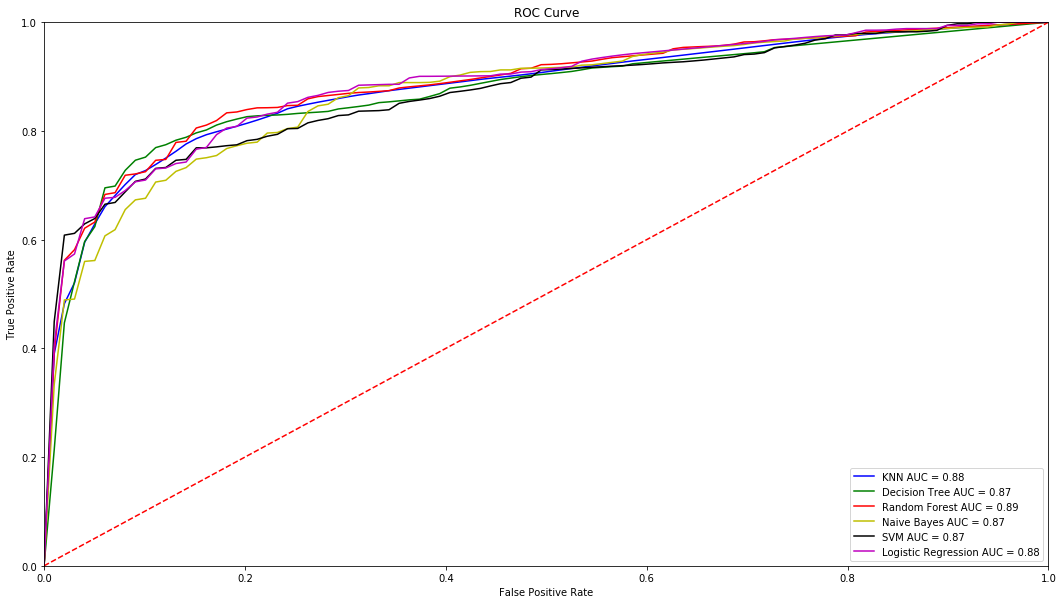

In [346]:
# Cria Plot de todas as curvas ROC
#Plot do ROC
plt.figure(figsize=(18,10))
plt.title('ROC Curve')
plt.plot(DF_AUC.loc['KNN']['False Positive Rate'], DF_AUC.loc['KNN']['True Positive Rate'], 'b',
label='KNN AUC = %0.2f'% DF_AUC.loc['KNN']['ROC AUC'])
plt.plot(DF_AUC.loc['Decision Tree']['False Positive Rate'], DF_AUC.loc['Decision Tree']['True Positive Rate'], 'g',
label='Decision Tree AUC = %0.2f'% DF_AUC.loc['Decision Tree']['ROC AUC'])
plt.plot(DF_AUC.loc['Random Forest']['False Positive Rate'], DF_AUC.loc['Random Forest']['True Positive Rate'], 'r',
label='Random Forest AUC = %0.2f'% DF_AUC.loc['Random Forest']['ROC AUC'])
plt.plot(DF_AUC.loc['Naive Bayes']['False Positive Rate'], DF_AUC.loc['Naive Bayes']['True Positive Rate'], 'y',
label='Naive Bayes AUC = %0.2f'% DF_AUC.loc['Naive Bayes']['ROC AUC'])
plt.plot(DF_AUC.loc['SVM']['False Positive Rate'], DF_AUC.loc['SVM']['True Positive Rate'], 'black',
label='SVM AUC = %0.2f'% DF_AUC.loc['SVM']['ROC AUC'])
plt.plot(DF_AUC.loc['Logistic Regression']['False Positive Rate'], DF_AUC.loc['Logistic Regression']['True Positive Rate'], 'm',
label='Logistic Regression AUC = %0.2f'% DF_AUC.loc['Logistic Regression']['ROC AUC'])
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Considerando a AUC, o melhor classificador é Random Forest com (0,89), com os piores a corresponderem a SVM, Naive Bayes e Decision Tree (0,87). De referir que a diferença entre a AUC máxima e mínima é muito reduzida já que as curvas são muito próximas ao longo de praticamente todo o eixo x. Esta proximidade das curvas e similaridade dos valores AUC parece ser resultado da inexistência de modelos com desempenhos muito inferiores aos restantes e por outro lado ao facto de termos um Dataset com alguma skewedness para os casos TN, atenuando a curva.

De referir que SVM, com kernel standard, não determina probabilidades de pertença a uma classe mas sim as classes propriamente ditas. Ainda assim, exstem kernels que o permitem, situação que penso ser a que se verifica neste projeto, pelo que considerarei a curva ROC de SVM como válida.

Se considerarmos que queremos encontrar o melhor Threshold que garanta um bom compromisso entre TPR e FPR, ou seja, entre Recall e Specificity (FP vs FN), podemos utilizar o seguinte método:
 - Translacionar a reta diagonal correspondente à utilização de um modelo preditivo aleatório na direção do canto superior esquerdo. O ponto em que esta reta interseta a curva será o que corresponde a um bom compromisso entre Recall e Specificity, já que será o ponto que melhor se aproxima dos valores ideiais de Recall = 1 e Specificity = 1 (ver imagem em baixo para exemplo deste procedimento). 

![alt text](Images/Optimal_Threshold.jpg "ROC Optimal")

Não tendo neste caso nenhuma razão para castigar os Falsos Positivos vs os Falsos Negativos (ou vice versa), considerarei a AUC como a métrica mais indicada de avaliação, tendo RandomForest a melhor performance.

Vejamos agora a curva PRC:

### 6.9.3. Curva PRC - Comparação

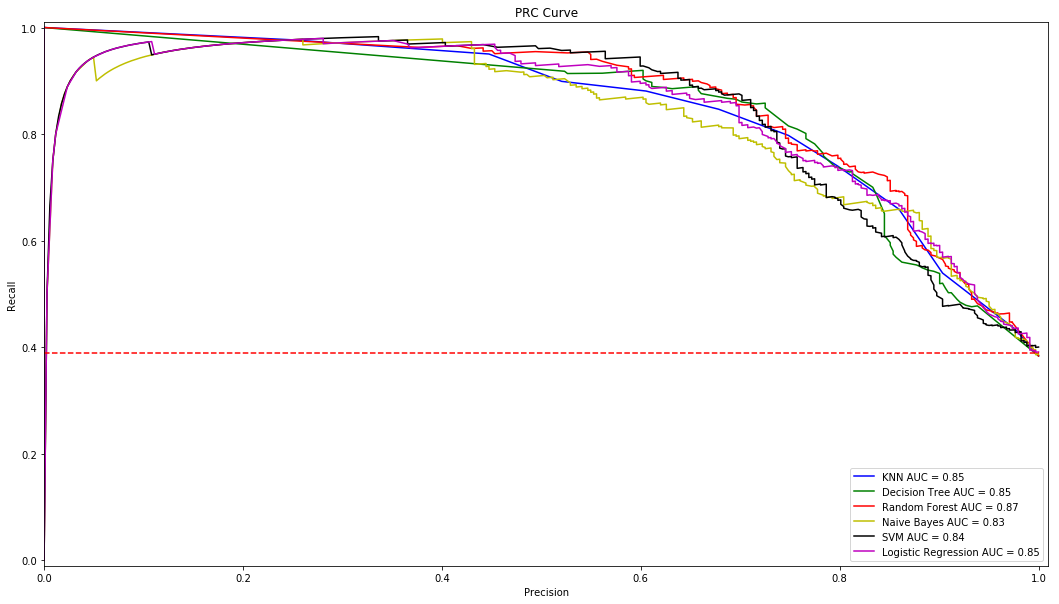

In [347]:
# Cria Plot de todas as curvas PRC
#Plot do ROC
plt.figure(figsize=(18,10))
plt.title('PRC Curve')
plt.plot(DF_AUC.loc['KNN']['Recall'], DF_AUC.loc['KNN']['Precision'], 'b',
label='KNN AUC = %0.2f'% DF_AUC.loc['KNN']['PRC AUC'])
plt.plot(DF_AUC.loc['Decision Tree']['Recall'], DF_AUC.loc['Decision Tree']['Precision'], 'g',
label='Decision Tree AUC = %0.2f'% DF_AUC.loc['Decision Tree']['PRC AUC'])
plt.plot(DF_AUC.loc['Random Forest']['Recall'], DF_AUC.loc['Random Forest']['Precision'], 'r',
label='Random Forest AUC = %0.2f'% DF_AUC.loc['Random Forest']['PRC AUC'])
plt.plot(DF_AUC.loc['Naive Bayes']['Recall'], DF_AUC.loc['Naive Bayes']['Precision'], 'y',
label='Naive Bayes AUC = %0.2f'% DF_AUC.loc['Naive Bayes']['PRC AUC'])
plt.plot(DF_AUC.loc['SVM']['Recall'], DF_AUC.loc['SVM']['Precision'], 'black',
label='SVM AUC = %0.2f'% DF_AUC.loc['SVM']['PRC AUC'])
plt.plot(DF_AUC.loc['Logistic Regression']['Recall'], DF_AUC.loc['Logistic Regression']['Precision'], 'm',
label='Logistic Regression AUC = %0.2f'% DF_AUC.loc['Logistic Regression']['PRC AUC'])
plt.legend(loc='lower right')
plt.plot([0,1],[0.39,0.39],'r--')
plt.xlim([0,1.01])
plt.ylim([-0.01,1.01])
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.show()

Considerando a AUC, o melhor classificador é Random Forest com (0,87), com os piores a corresponderem ao Naive Bayes (0,83), seguido por SVM (0,84). Os restantes classificadores apresentam valores de 0,85. Quando comparados com os AUC de ROC, parece haver uma maior diferenciação entre os clasificadores.

Ao analisarmos as linhas , verificamos que o SVM apresenta um bom desempenho até sensívelmente um threshold de 0,7 de Precision, após o qual a curva baixa significativamente , cruzando todas as linhas menos Naibe Bayes.

Random Forest (e Decision Tree) são mais regulares, surgindo mais vezes perto do topo.

O modelo ideal é aquele que mais se aproxima do canto superior direito, correspondente a um Recall =1 e Precision = 1 e AUC = 1. Assim e como não tenho razões para castigar mais os FP que os FN (e vice versa), considerarei a AUC para comparação entre os modelos, correspondendo a Random Forest o melhor desempenho (à qual corresponde também o melhor desempenho na zona de "Optimal Threshold"). Não se verifica no entanto uma grande diferença entre modelos quer na curva PRC quer na ROC.

O uso deste critério parece indicar que Random Forest, Decision Tree e KNN são 3 classificadores com igual desempenho no ponto mais próximo do canto superior direito (correspondente a Precision (~76%) e Recall (~76%). É importante notar que existe uma grande proximidade neste ponto de outros dois classificadores, Logistic Regression e SVM.

### 6.9.4. Conclusões

Segundo os critérios observados, Accuracy, F-Measure, ROC AUC e PRC AUC, __selecionaria Random Forest__ como classificador com melhor potencial, já que apresenta boa Accuracy e F-Measure e os melhores ROC AUC e PRC AUC. Ao mesmo tempo, como classificador é mais robusto que Decision Tree.

Este classificador apresenta também o melhor desempenho nos pontos ótimos (threshold) de ROC e PRC, considerando como ótimo o melhor equiíbrio entre TPR/FPR e Precision/Recall, já que neste caso procuramos prever os sobreviventes de uma catástrofe ocorrida à mais de 1 século e para a qual a previsão de casos incorretos, FP e FN podem ser encaradas com igual gravidade.

__Random Forest parece assim corresponder a um classificador que não tendo a melhor Accuracy, tem excelente desempenho segundo todos os critérios, apresentando-se como o classificador mais equilibrado.__ 

Se o objetivo for puramente obter a melhor previsão possível de TP e TN através de Accuracy, ignorando as restantes métricas, então __SVM poderá corresponder ao melhor classificador, seguido por Random Forest__. __Decision Tree poderá ou não ter o melhor desempenho, já que tem tendência para fazer overfitting__, o que poderá significar que numa previsão de dados que nunca viu, poderá ter uma Accuracy inferior às de SVM ou Random Forest. __Por esta razão, confio mais na robustez de SVM quando comparado com Decision Tree__.

Por forma a validar o funcionamento dos modelos, estes classificadores foram utilizados no dataset test_set e os resultados submetidos no Kaggle para avaliação de desempenho. __O Kaggle apenas avalia a Accuracy do modelo, pelo que os resultados não representam necessariamente o modelo mais equilibrado segundo os restantes critérios Precision, Recall, Specificity, F1-score e curvas ROC ou PRC__. Ainda assim será uma avaliação interessante ao resultado deste projecto.

## 7. Previsão

In [348]:
test_data = test_set.drop(['PassengerId','Survived'],axis=1)

In [363]:
classifier = SVC(C=1000,gamma=0.01,kernel='rbf')
#classifier = DecisionTreeClassifier(random_state=101)
#classifier = LogisticRegression()
#classifier = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=10, p=2, weights='uniform')
#classifier = RandomForestClassifier(n_estimators=10)
#classifier = RandomForestClassifier(n_estimators=1400,random_state=101,min_samples_split=2, min_samples_leaf=1,max_features='auto',max_depth=40,bootstrap=False)
#classifier = GaussianNB()    

classifier.fit(X_train,Y_train)

prediction = classifier.predict(test_data)

submission = pd.DataFrame({'PassengerId':test_set['PassengerId'],'Survived':prediction})

submission.to_csv('titanic_python_KNN.csv',index=False)
submission.head()

C:\Users\migue\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


Esta previsão alcançou os seguintes resultados no Kaggle:
 - __SVM: 81,8%__;
 - Random Forest: 80,4%;
 - Decision Tree: 79,9%;
 - kNN: 78,5%;
 - Logistic Regression: 77,5%;
 - Naive Bayes: 74,2%.
 
__SVM revela-se assim o classificador com melhor Accuracy__ (342 passageiros corretamente classifcados) dos casos de test_set, de entre todos os classificadores testados, seguido de perto por Random Forest (336 passageiros corretamente classificados), o classificador que tinha identificado como o classificador com melhor potencial. 